In [1]:
# set up 
lunarc = 0
seed_data = 7
nbr_rounds = 5 

import os

print(os.getcwd())

# set the wd to the base folder for the project
os.chdir('/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/hodgkin_huxley')

print(os.getcwd())

import matplotlib.pyplot as plt
import numpy as np
from sbi import utils as utils
import random

/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/hodgkin_huxley
/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/hodgkin_huxley


In [2]:
def read_res_file(path):
    f =  open(path, 'r')
    data =  f.readlines()
    f.close 
    return list(map(float,data))

# this func. is used to read both the posteiro sames and the data samples 
def read_posterior_samples(p):
    return np.loadtxt(p, delimiter=",")

In [3]:
import torch 
from torch.distributions.multivariate_normal import MultivariateNormal

def fit_gaussian_dist(post_samples):

    mean = np.mean(post_samples, axis=0)
    cov = np.cov(post_samples, rowvar=0)

    return MultivariateNormal(loc=torch.from_numpy(mean).to(dtype=torch.float32),
                              covariance_matrix=torch.from_numpy(cov).to(dtype=torch.float32))


In [4]:
plt.style.use('seaborn')
plt.rcParams['lines.markeredgewidth'] = 1
seed_max = 1

# only use type 1 fonts in figures
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

##  nbr samples = 10

In [5]:
nbr_params = 10
data_set = "snl"

In [6]:
import HodgkinHuxley
import functions as func

model = HodgkinHuxley.HodgkinHuxley(data_set, nbr_params)

test
test
 
 << defining template for one-compartment sPY cell >> 
 
 
<< sPY: passive, INa, IK, IM inserted >>
 
	Vector[0] 


In [7]:
t_vec = np.array(HodgkinHuxley.h.t_vec)

In [8]:
dt = t_vec[1] - t_vec[0]

In [9]:
dt

0.025

In [9]:
v_true, Iinj = model.simulator(model.log_theta_true, seed_data, True)

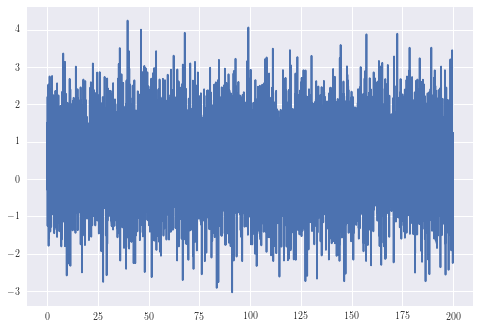

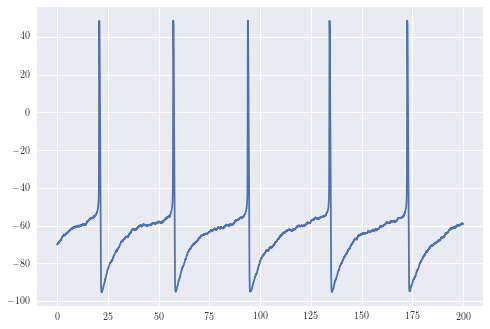

In [10]:
plt.figure()
plt.plot(t_vec, Iinj)

plt.figure()
plt.plot(t_vec, v_true)

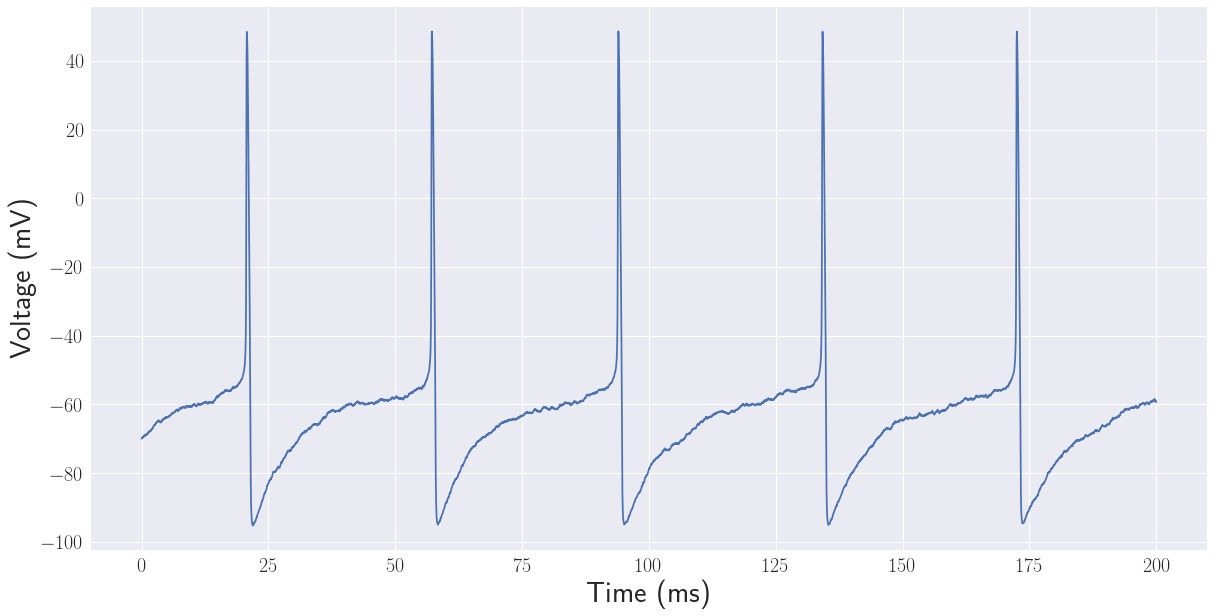

In [11]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1, 1, 1)
plt.plot(t_vec, v_true)
ax.set_ylabel("Voltage (mV) ", fontsize=30)
ax.set_xlabel("Time (ms)", fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=15)
plt.savefig("./fig/data.pdf", bbox_inches='tight')

In [12]:
theta_true = torch.from_numpy(np.array(model.log_theta_true)).to(dtype=torch.float32)

In [13]:
prior_limits = []

for i in range(nbr_params):
    prior_limits.append([round(model.prior.base_dist.low[i].item(),1),
                         round(model.prior.base_dist.high[i].item(),1)])


In [14]:

if nbr_params == 12:
    labels = [r"log(gbar_Na)",
              r"log(gbar_K)",
              r"log(g_leak)",
              r"log(E_Na)",
              r"log(-E_K)",
              r"log(-E_leak)",
              r"log(gbar_M)",
              r"log(tau_max)",
              r"log(kappa_beta_n_1)",
              r"log(kappa_beta_n_2)",
              r"log(Vt)",
              r"log(sigma)"]
else:
    labels = [r"$\log(\bar{g}_{Na})$",
              r"$\log(\bar{g}_K)$",
              r"$\log(g_{leak})$",
              r"$\log(E_{Na})$",
              r"$\log(-E_K)$",
              r"$\log(-E_{leak})$",
              r"$\log(\bar{g}_M)$",
              r"$\log(\tau_{max})$",
              r"$\log(Vt)$",
             r"$\log(\sigma)$"]

In [15]:
nbr_rounds = 12
x_grid = [1,2,3,4,5,6,7,8,9,10]
x_grid_extended = [2,4,6,8,10,12,14,16,18,20]

### sbi 500 

In [16]:
nbr_samples = 200
job = str(data_set) + "_" + str(nbr_params) + "_" + str(nbr_samples)

In [18]:
job

'snl_10_200'

In [17]:
seed_max = 10

In [ ]:
snpe_c_res = np.zeros((2, seed_max))


In [18]:
smcabc_res = np.zeros((1, 1))

for i in range(1):
    p = 'results/abcsmc_'  + job + '_' + str(i+1) + '.txt'
    print(p)
    smcabc_res[:,i] = read_res_file(p)

results/abcsmc_snl_10_200_1.txt


In [86]:
snl_res = np.zeros((2, seed_max))

for i in range(seed_max):
    p = 'results/snl'  + '_' + job + '_' + str(i+1) + '.txt'
    snl_res[:,i] = read_res_file(p)

In [87]:
snpe_c_res = np.zeros((2, seed_max))

for i in range(seed_max):
    p = 'results/snpec'  + '_' + job + '_' + str(i+1) + '.txt'
    snpe_c_res[:,i] = read_res_file(p)

In [100]:
snpla_res = np.zeros((2, seed_max))

for i in range(seed_max):
    p = 'results/snpla_'  + job + '_' + str(i+1) + '.txt'
    snpla_res[:,i] = read_res_file(p)

In [200]:
print(np.median(snl_res[0,:]))
print(np.median(snpe_c_res[0,:]))
print(np.median(snpla_res[0,:]))

42554.70005
5240.25155
4196.10975


In [201]:
print(np.median(snl_res[1,:]))
print(np.median(snpe_c_res[1,:]))
print(np.median(snpla_res[1,:]))

1824.4024
0.1669
0.19635


In [26]:
snl_res[1,0]/snpe_c_res[1,:].mean()

9620.332648414505

In [27]:
snl_res[1,0]/snpla_res[1,:].mean()

8722.286390413372

In [91]:
smcabc_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(1):
    smcabc_post_i = []
    for j in range(1):
        p = 'data/post_samples_snpec_' + str(i+1) + '_' + job + '_' + str(j+1)  + '.csv'
        smcabc_post_i.append(read_posterior_samples(p))
            
    smcabc_post.append(smcabc_post_i)

In [30]:
smcabc_post[0][0].shape

(1000, 10)

In [93]:
seed_max = 10

In [92]:
nbr_rounds = 12

In [94]:
snpe_c_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snpe_c_post_round_i = []
    for j in range(seed_max):
        p = 'data/post_samples_snpec_' + str(i+1) + '_' + job + '_' + str(j+1)  + '.csv'
        snpe_c_post_round_i.append(read_posterior_samples(p))
            
    snpe_c_post.append(snpe_c_post_round_i)

In [28]:
snpe_c_post[0][1].shape

(1000, 10)

In [95]:
snl_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds): # should be nbr_rounds later
    snl_post_round_i = []
    for j in range(seed_max):
        p = 'data/post_samples_snl_' + str(i+1) + '_' + job + '_' + str(j+1)  +  '.csv'
        snl_post_round_i.append(read_posterior_samples(p))
            
    snl_post.append(snl_post_round_i)

In [103]:
snpla_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds): # should be nbr_rounds later
    snpla_post_round_i = []
    for j in range(seed_max):
        p = 'data/post_samples_snpla_' + str(i+1) + '_' + job + '_' + str(j+1)  +  '.csv'
        snpla_post_round_i.append(read_posterior_samples(p))

    snpla_post.append(snpla_post_round_i)

In [104]:
log_prob_smcabc = np.zeros((1,1))
log_prob_snpe_c = np.zeros((nbr_rounds,seed_max))
log_prob_snl = np.zeros((nbr_rounds,seed_max))
log_prob_snpla = np.zeros((nbr_rounds,seed_max))

for i in range(1): 
    for j in range(1):
        log_prob_smcabc[i,j] = -fit_gaussian_dist(smcabc_post[i][j]).log_prob(theta_true).item()

for i in range(nbr_rounds): 
    for j in range(seed_max):
        log_prob_snpe_c[i,j] = -fit_gaussian_dist(snpe_c_post[i][j]).log_prob(theta_true).item()

for i in range(nbr_rounds): 
    for j in range(seed_max):
        log_prob_snl[i,j] = -fit_gaussian_dist(snl_post[i][j]).log_prob(theta_true).item()

for i in range(nbr_rounds): 
    for j in range(seed_max):
        log_prob_snpla[i,j] = -fit_gaussian_dist(snpla_post[i][j]).log_prob(theta_true).item()


    
    

In [168]:
log_prob_smcabc

array([[-20.4759407]])

In [37]:
snpe_c_res[0,:].mean()

5362.10663

In [105]:
snpla_res[0,:].mean()

4191.13192

In [39]:
snl_res[0,:].mean()

43598.188180000005

In [106]:
runtime_one_iter_snl = snl_res[0,:].mean()/nbr_rounds/60
runtime_one_iter_snpe_c = snpe_c_res[0,:].mean()/nbr_rounds/60
runtime_one_iter_snpla = snpla_res[0,:].mean()/nbr_rounds/60

x_snl = []
x_snpe_c = []
x_snpla = []

x_snl.append(runtime_one_iter_snl)
x_snpe_c.append(runtime_one_iter_snpe_c)
x_snpla.append(runtime_one_iter_snpla)

for i in range(nbr_rounds-1):
    
    x_snl.append(x_snl[i] + runtime_one_iter_snl)
    x_snpe_c.append(x_snpe_c[i] + runtime_one_iter_snpe_c)
    x_snpla.append(x_snpla[i] + runtime_one_iter_snpla)
    


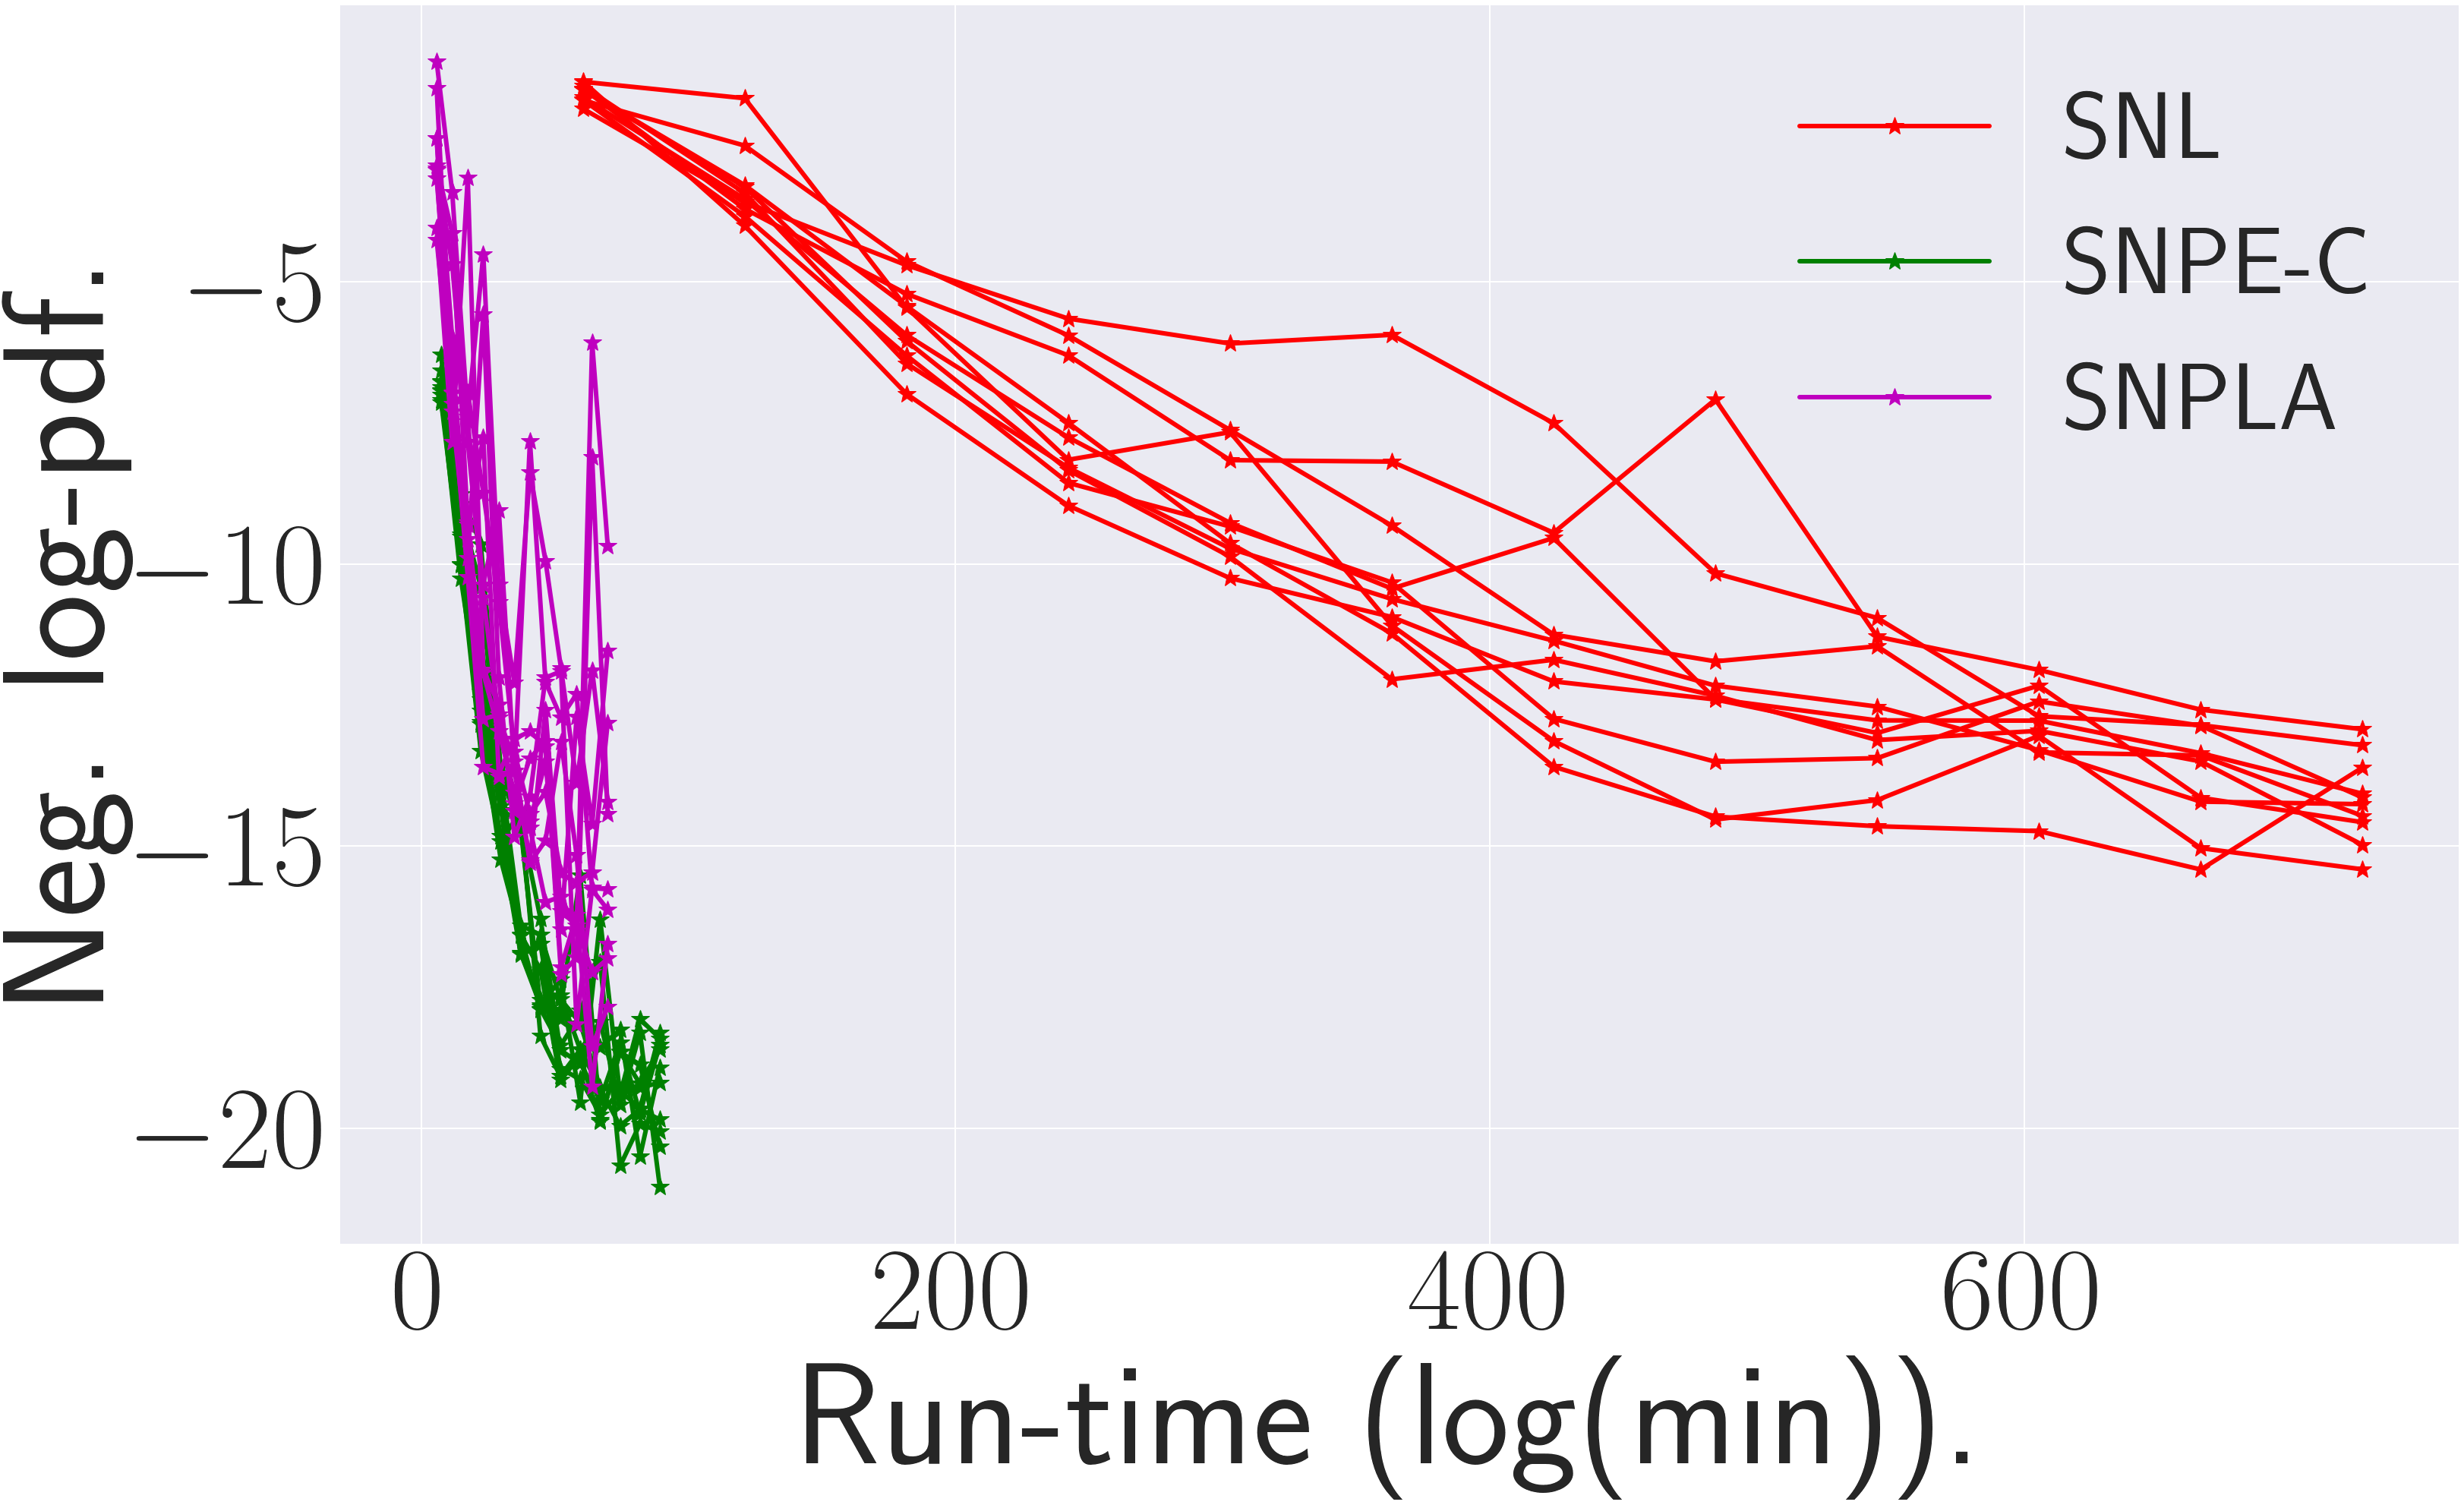

In [107]:
fig = plt.figure(figsize = (50,30))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_snl, log_prob_snl[:,0], color = "r",
         label='SNL', linewidth=6, marker = "*", markersize=25)

ax.plot(x_snl, log_prob_snl[:,1:seed_max], color = "r", 
        linewidth=6, marker = "*", markersize=25)

ax.plot(x_snpe_c, log_prob_snpe_c[:,0], color = "g",
         label='SNPE-C', linewidth=6, marker = "*", markersize=25)

ax.plot(x_snpe_c, log_prob_snpe_c[:,1:seed_max], color = "g", 
        linewidth=6, marker = "*", markersize=25)

ax.plot(x_snpla, log_prob_snpla[:,0], color = "m",
         label='SNPLA', linewidth=6, marker = "*", markersize=25)

ax.plot(x_snpla, log_prob_snpla[:,1:seed_max], color = "m", 
        linewidth=6, marker = "*", markersize=25)

ax.grid(color='w', linestyle='-', linewidth=2)
ax.tick_params(axis='both', which='major', labelsize=155)
ax.tick_params(axis='both', which='minor', labelsize=150)
ax.legend(prop={'size': 125})
ax.set_ylabel("Neg. log-pdf.", fontsize=190)
ax.set_xlabel("Run-time (log(min)).", fontsize=190)
#ax.legend(prop={'size': 140}, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xscale("linear")
plt.savefig("./fig/neg_log_pdf_posteriors.pdf", bbox_inches='tight')

In [168]:
np.median(log_prob_snl,axis = 1).shape

(12,)

In [215]:
x_snpla

[5.8210165555555555,
 11.642033111111111,
 17.463049666666667,
 23.284066222222222,
 29.105082777777778,
 34.92609933333333,
 40.747115888888885,
 46.568132444444444,
 52.389149,
 58.21016555555556,
 64.03118211111112,
 69.85219866666668]

In [216]:
x_snl

[60.5530391388889,
 121.1060782777778,
 181.6591174166667,
 242.2121565555556,
 302.7651956944445,
 363.3182348333334,
 423.8712739722223,
 484.4243131111112,
 544.9773522500001,
 605.530391388889,
 666.083430527778,
 726.6364696666669]

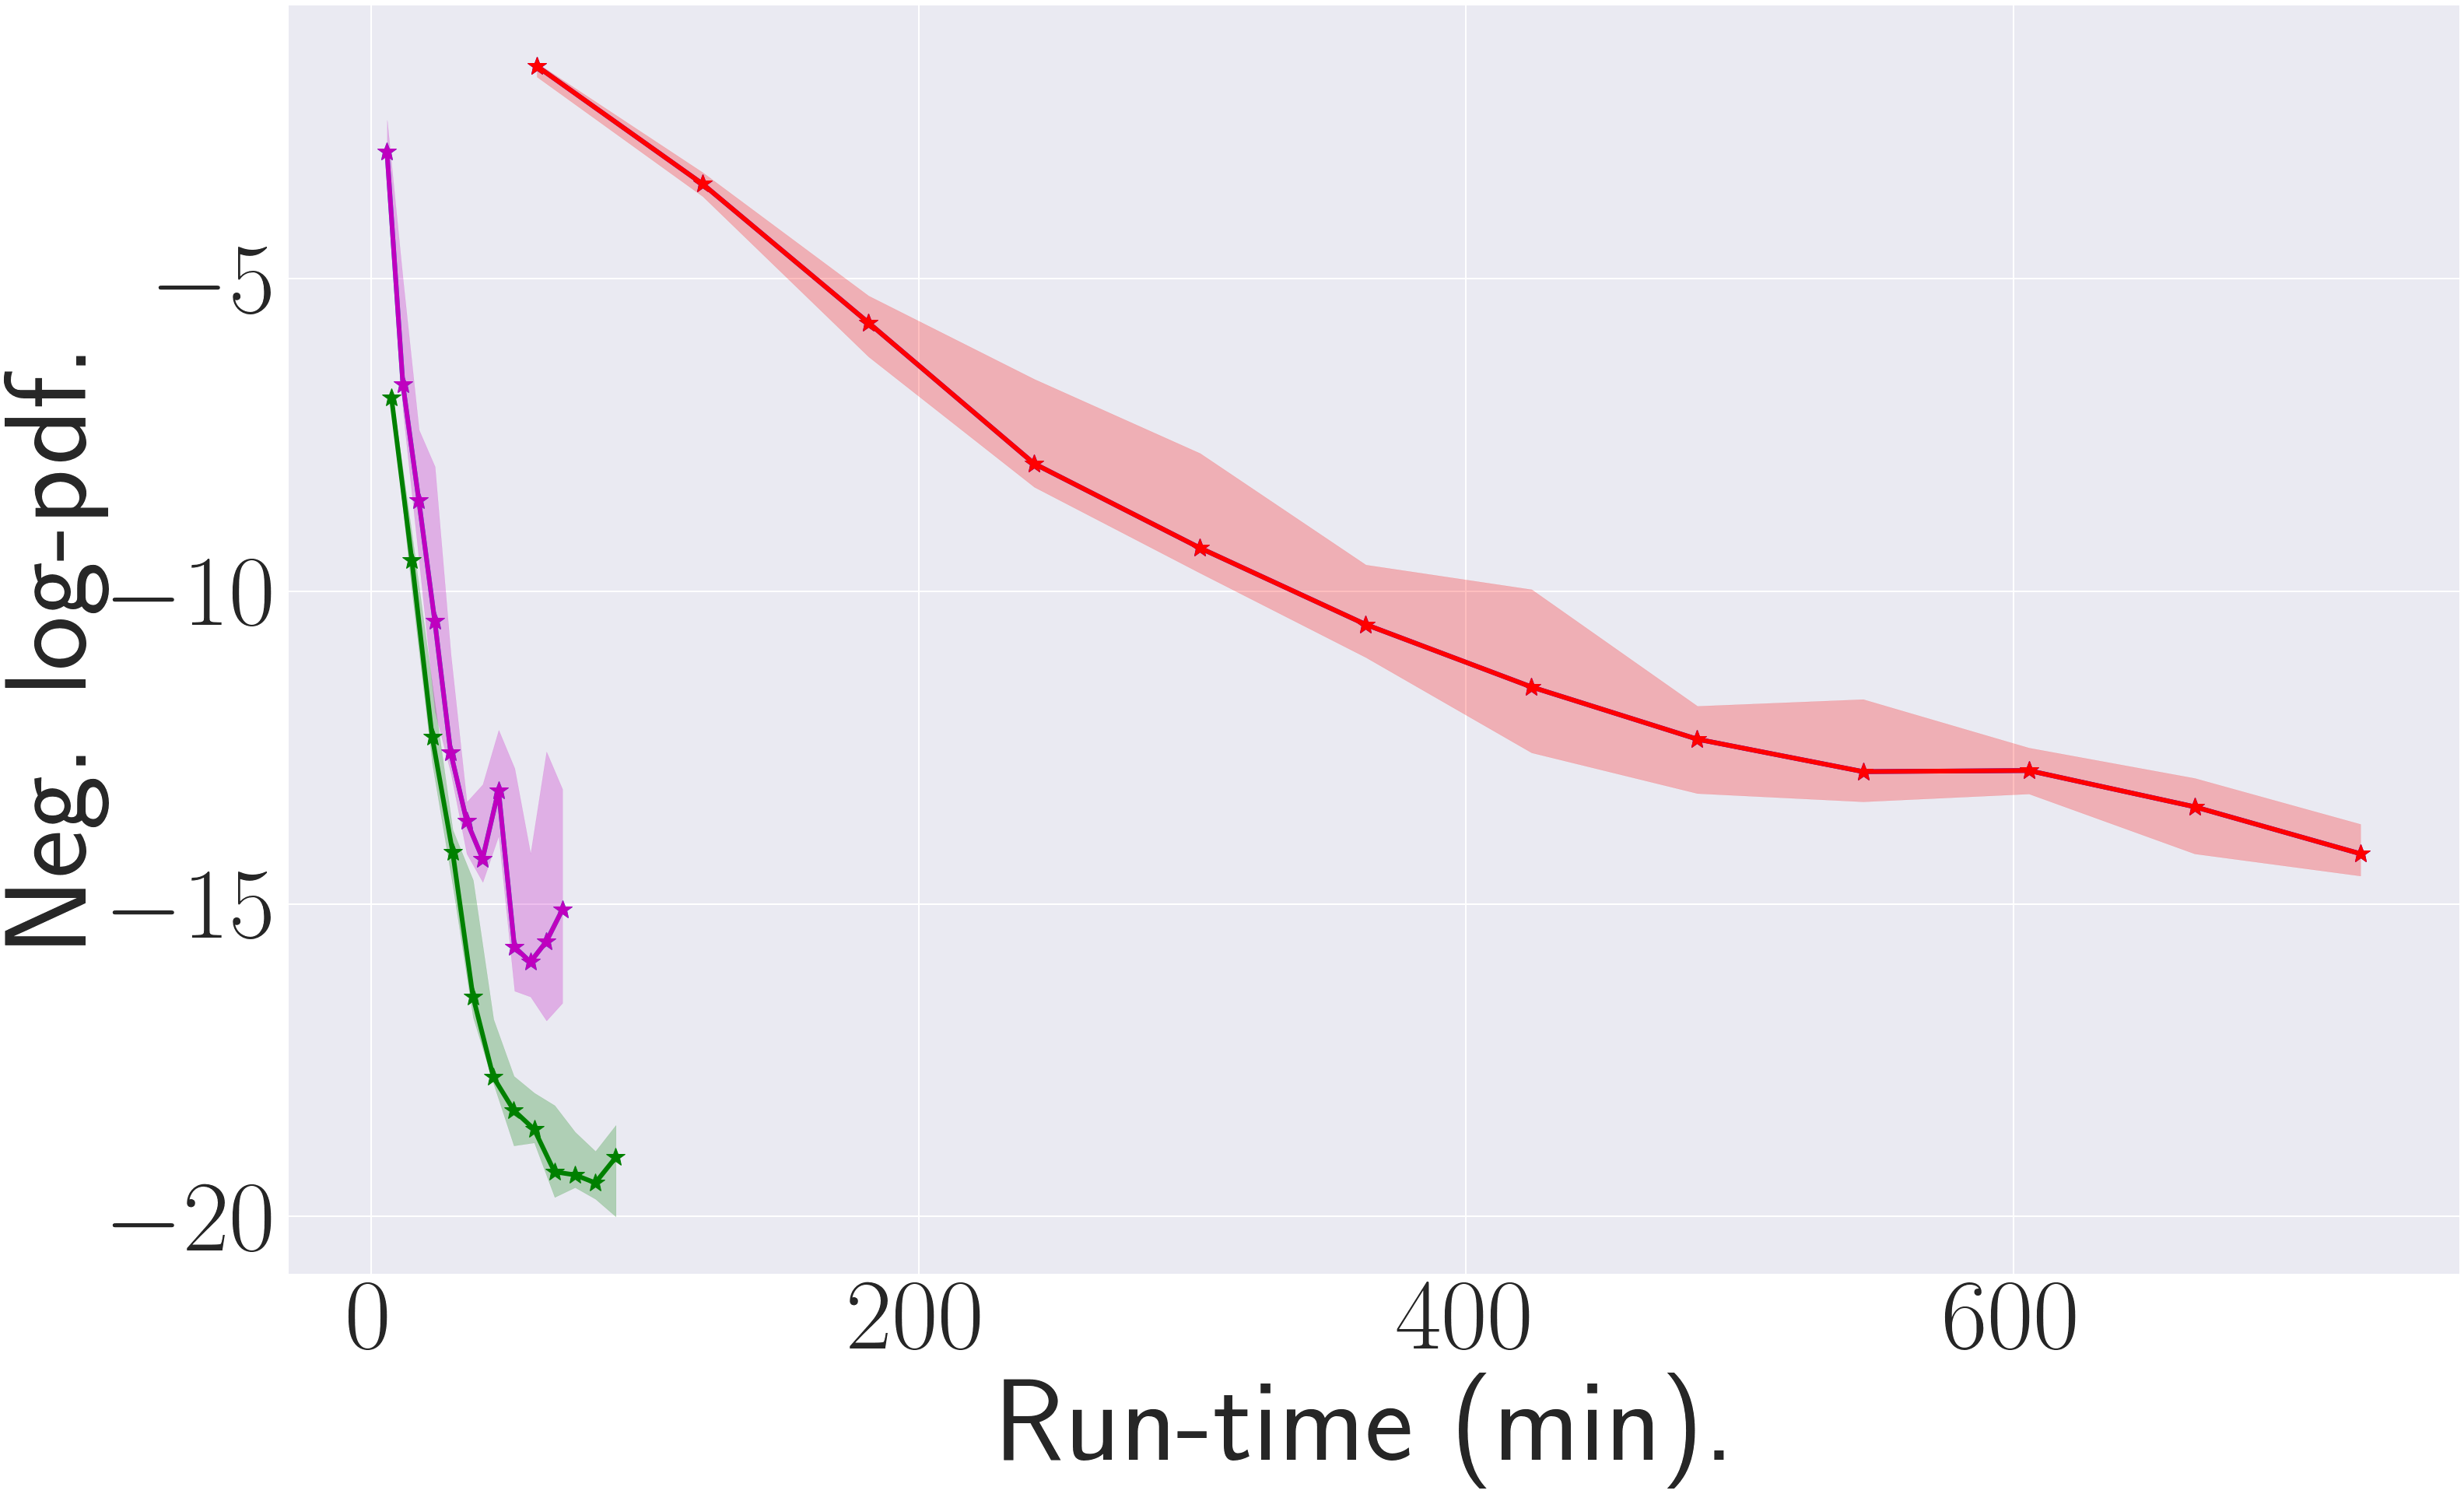

In [204]:
lower_w = 0.25
upper_q = 0.75

fig = plt.figure(figsize = (50,30))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_snl, np.median(log_prob_snl,axis = 1), color = "b",
         label='SMC-ABC', linewidth=6, marker = "*", markersize=25)


ax.plot(x_snl, np.median(log_prob_snl,axis = 1), color = "r",
         label='SNL', linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_snl, 
                np.quantile(log_prob_snl, lower_w, axis = 1), 
                np.quantile(log_prob_snl, upper_q, axis = 1), 
                alpha = 0.25, color = "r")

ax.plot(x_snpe_c, np.median(log_prob_snpe_c,axis = 1), color = "g",
         label='SNPE-C', linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_snpe_c, 
                np.quantile(log_prob_snpe_c, lower_w, axis = 1), 
                np.quantile(log_prob_snpe_c, upper_q, axis = 1), 
                alpha = 0.25, color = "g")

ax.plot(x_snpla, np.median(log_prob_snpla,axis = 1), color = "c",
         label='SNRE-B', linewidth=6, marker = "*", markersize=25)

ax.plot(x_snpla, np.median(log_prob_snpla,axis = 1), color = "m",
         label='SNPLA', linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_snpla, 
                np.quantile(log_prob_snpla, lower_w, axis = 1), 
                np.quantile(log_prob_snpla, upper_q, axis = 1), 
                alpha = 0.25, color = "m")

ax.grid(color='w', linestyle='-', linewidth=2)
ax.tick_params(axis='both', which='major', labelsize=130)
ax.tick_params(axis='both', which='minor', labelsize=130)
#ax.legend(prop={'size': 110})
ax.set_ylabel("Neg. log-pdf.", fontsize=150)
ax.set_xlabel("Run-time (min).", fontsize=150)
#ax.legend(prop={'size': 140}, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xscale("linear")
plt.savefig("./fig/neg_log_pdf_posteriors.pdf", bbox_inches='tight')

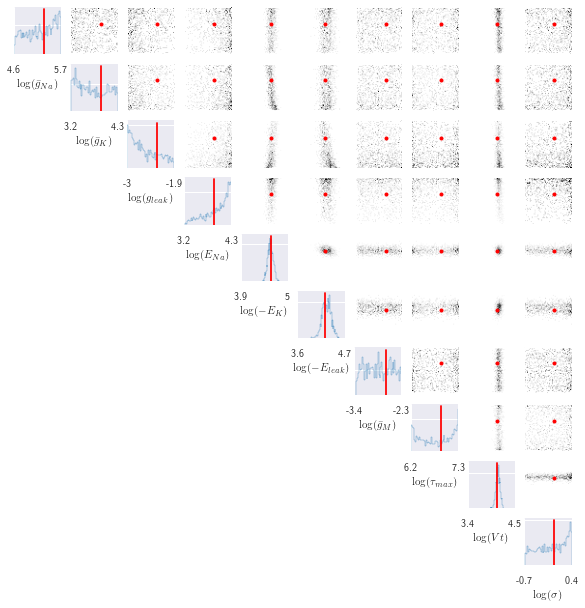

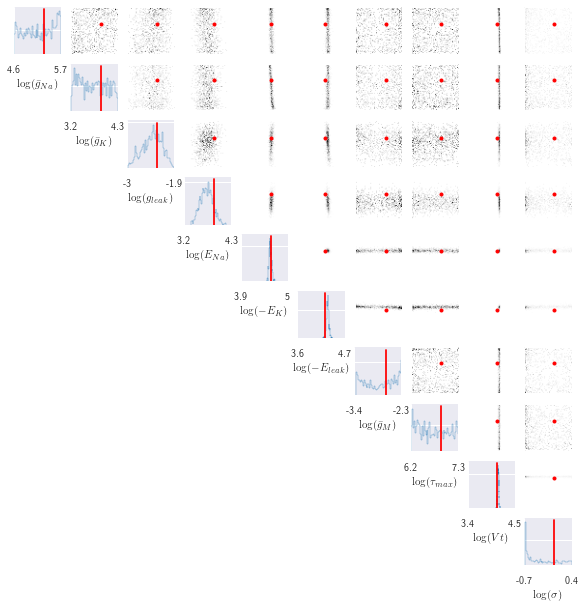

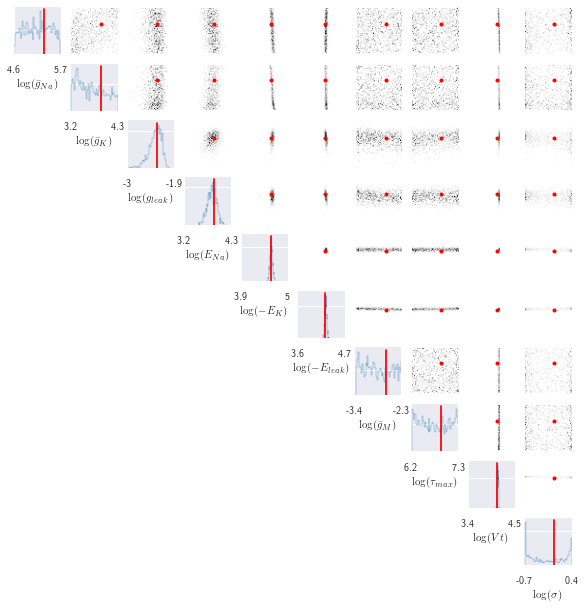

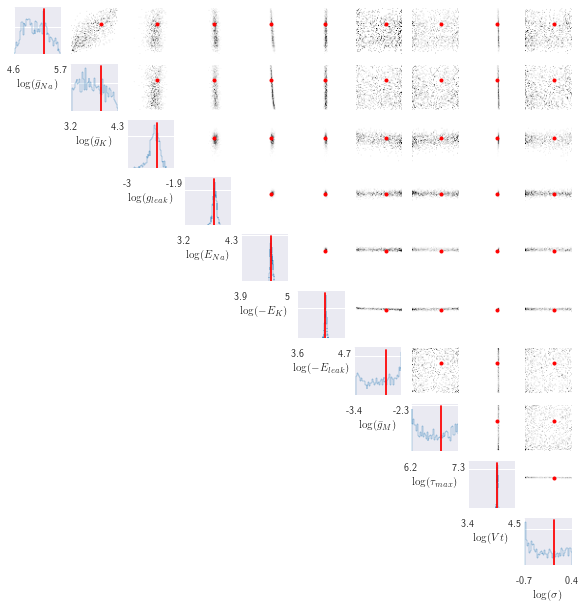

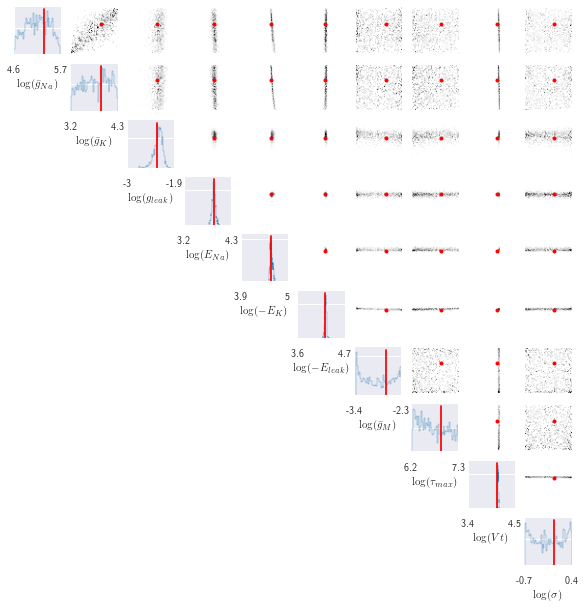

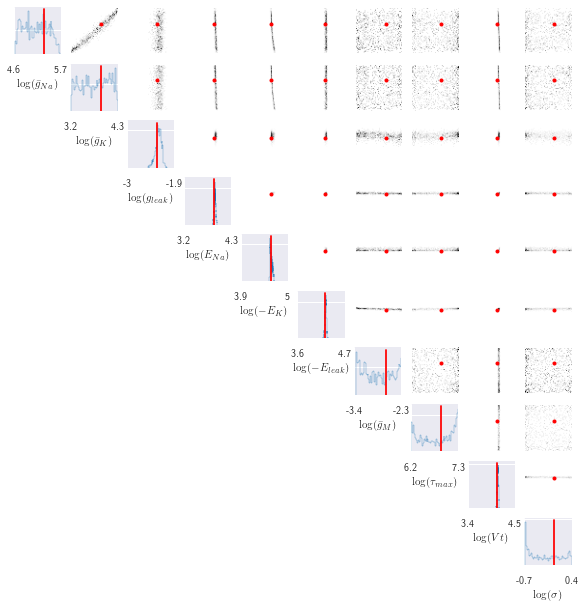

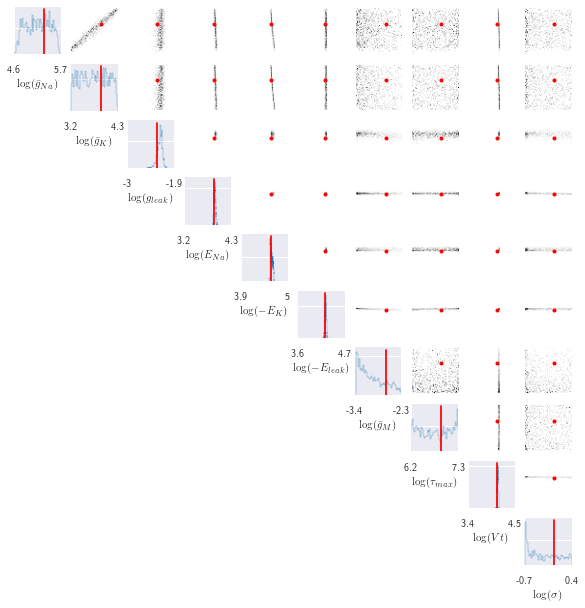

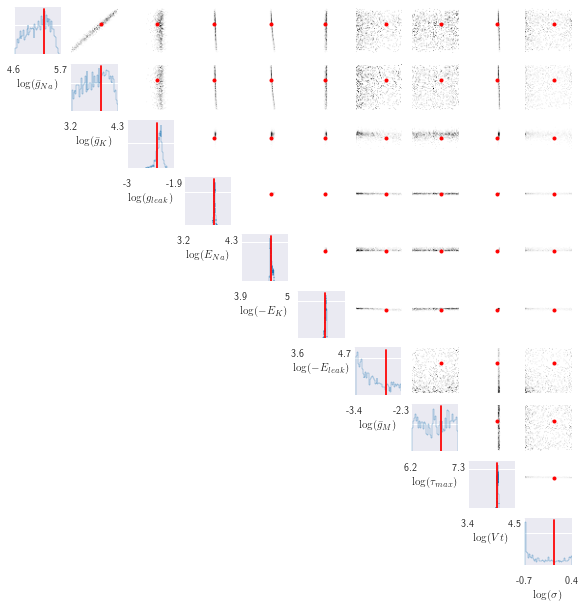

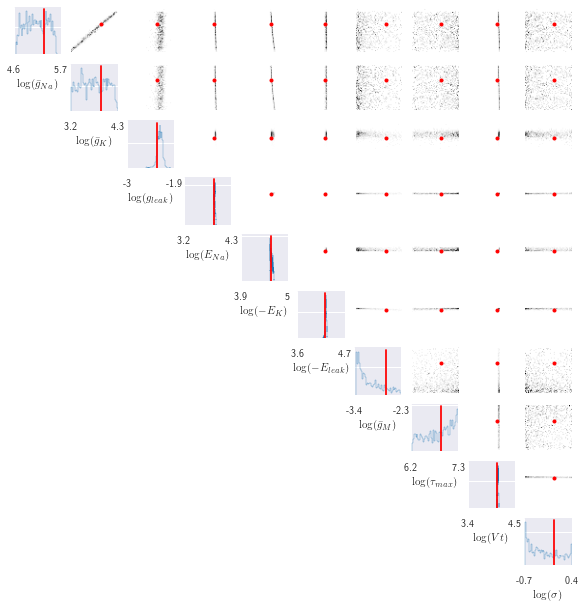

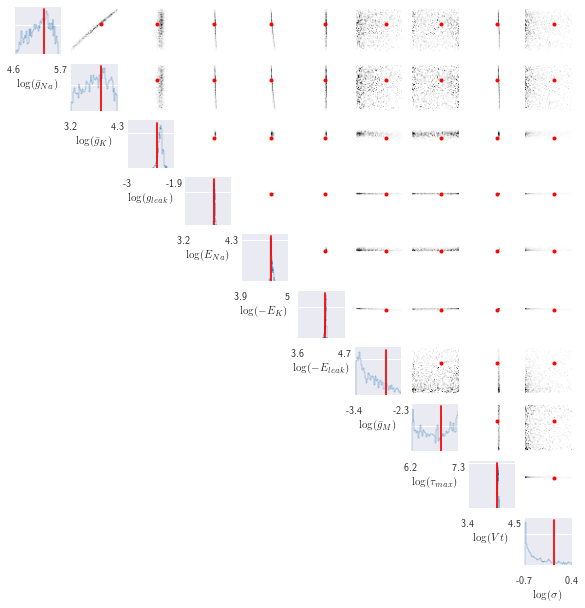

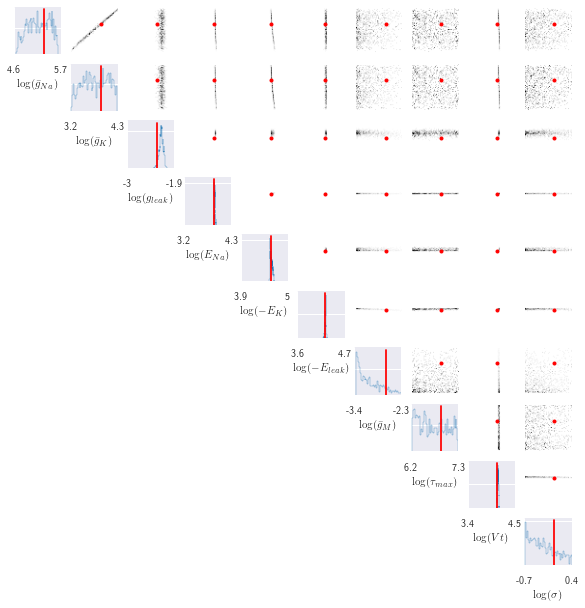

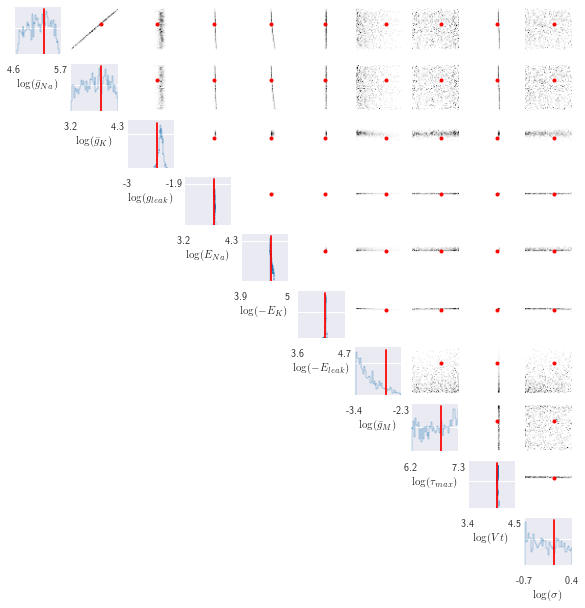

In [62]:
for i in range(nbr_rounds):
    fig, axes = utils.pairplot(snpe_c_post[i][0],
                           points=torch.as_tensor(model.log_theta_true),
                           points_offdiag={'markersize': 6},
                           points_colors='r',
                           limits=prior_limits,
                           ticks=prior_limits,
                           labels = labels)

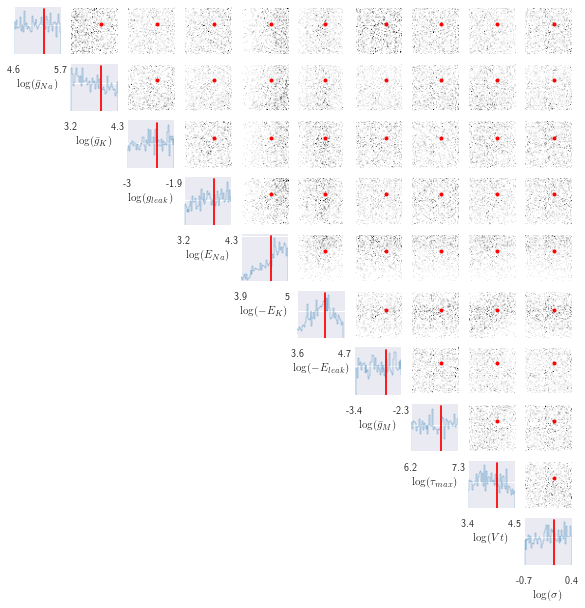

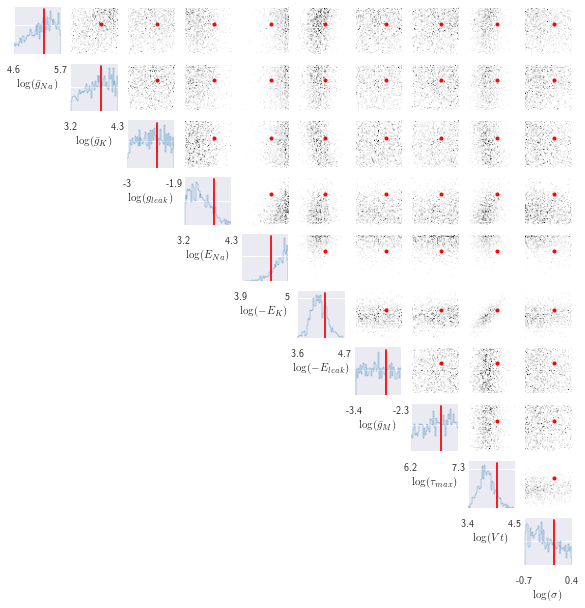

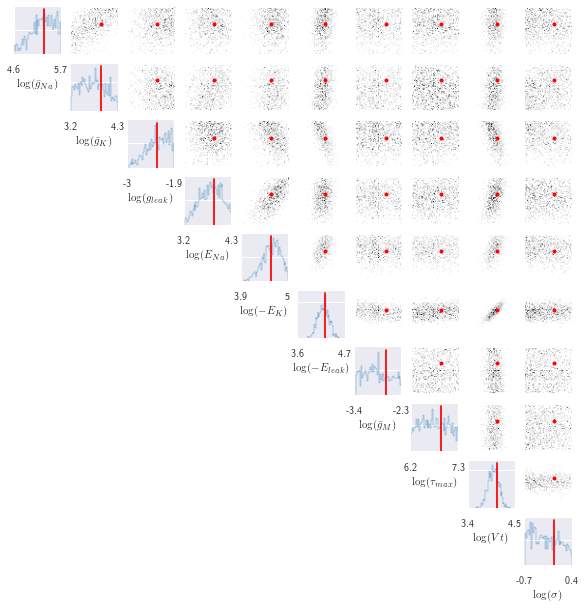

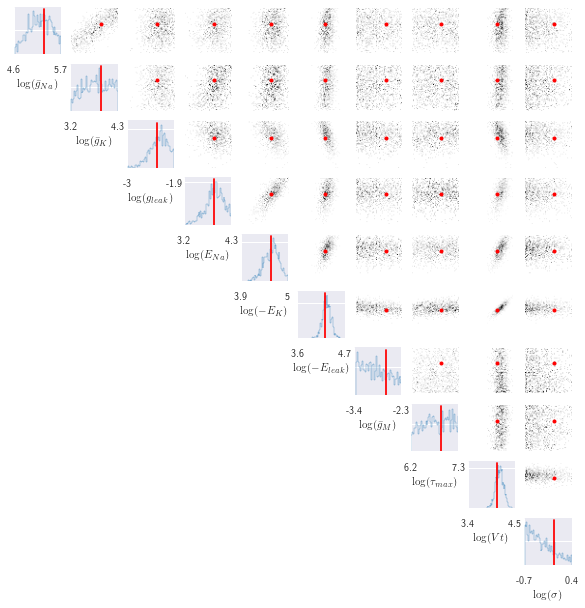

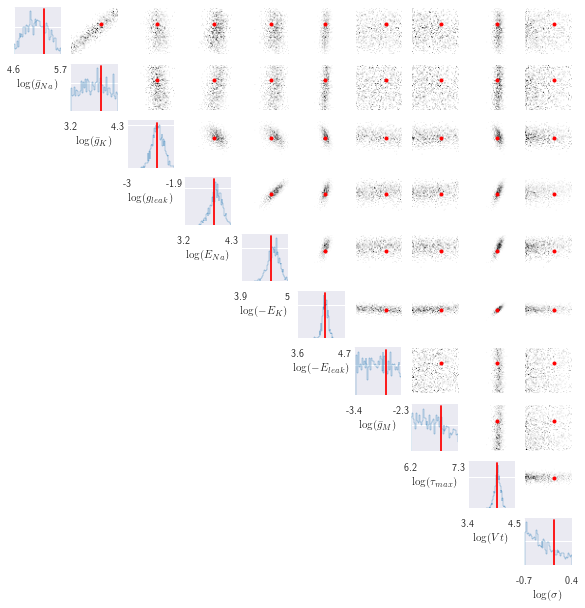

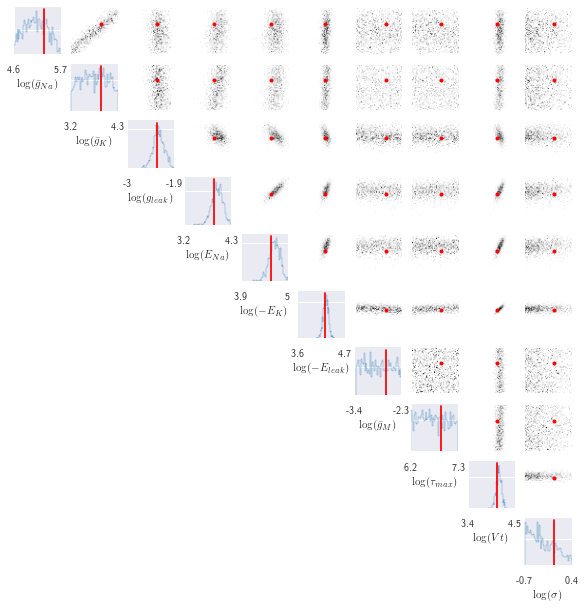

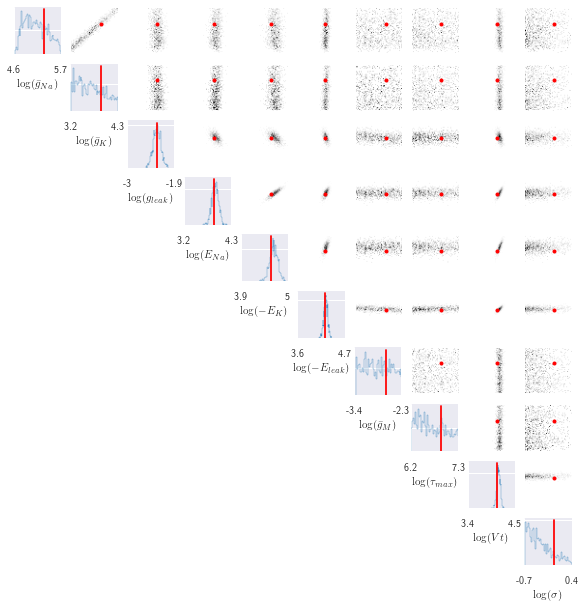

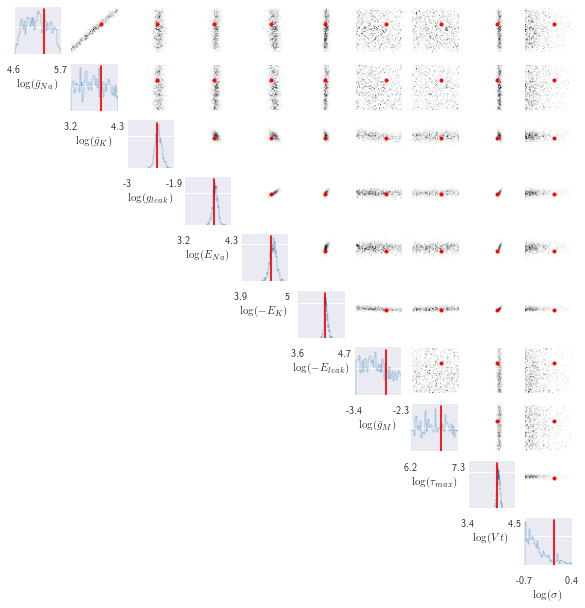

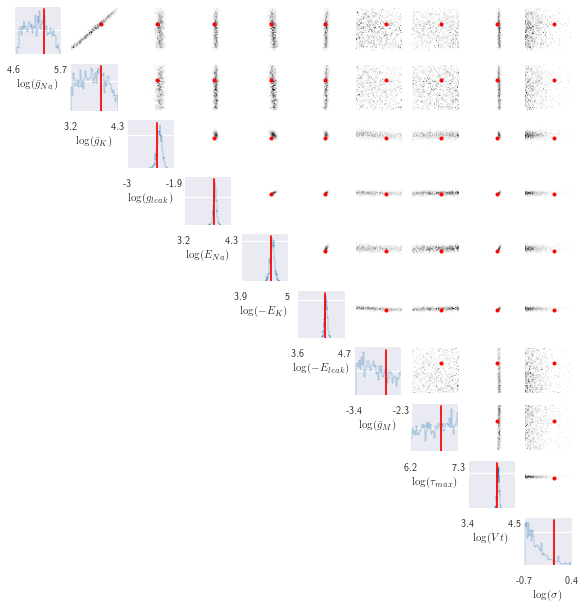

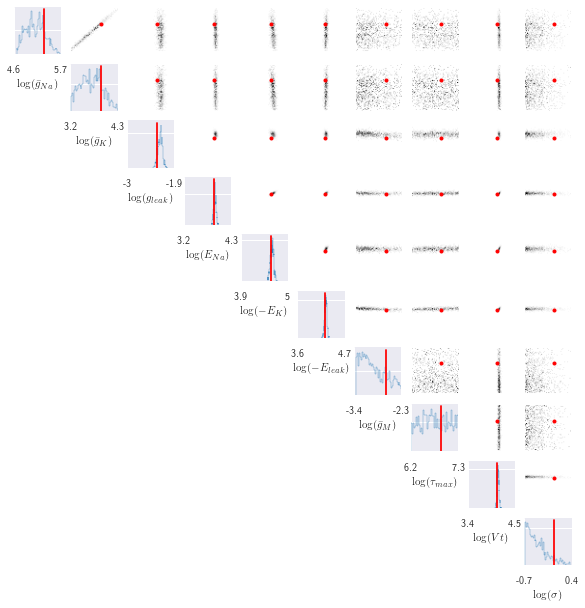

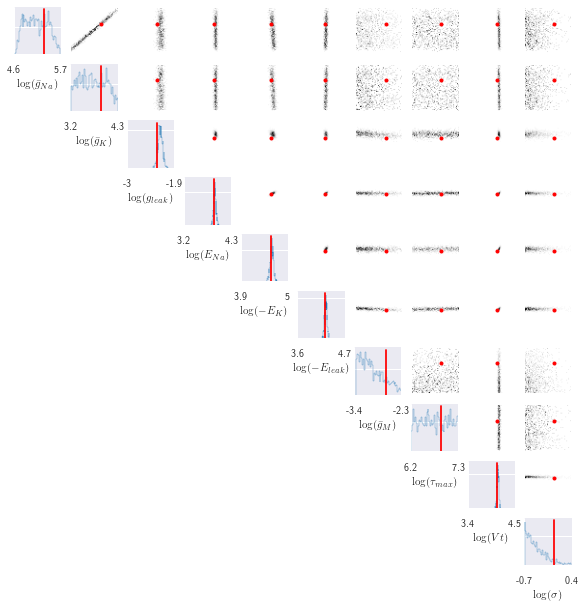

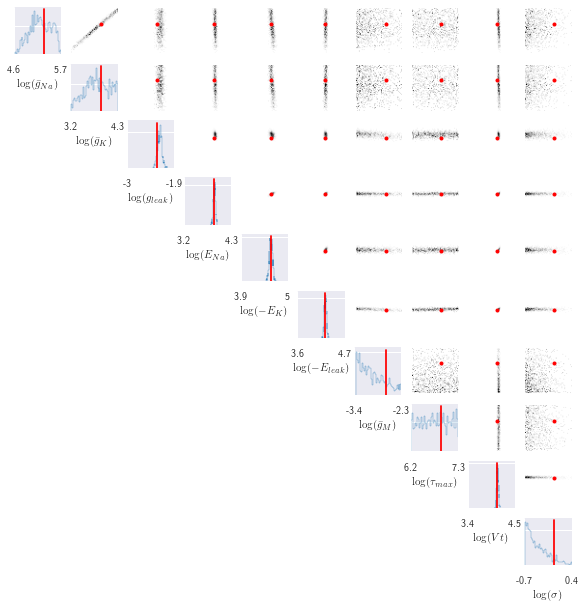

In [31]:
for i in range(nbr_rounds):
    fig, axes = utils.pairplot(snl_post[i][0],
                           points=torch.as_tensor(model.log_theta_true),
                           points_offdiag={'markersize': 6},
                           points_colors='r',
                           limits=prior_limits,
                           ticks=prior_limits,
                           labels = labels)

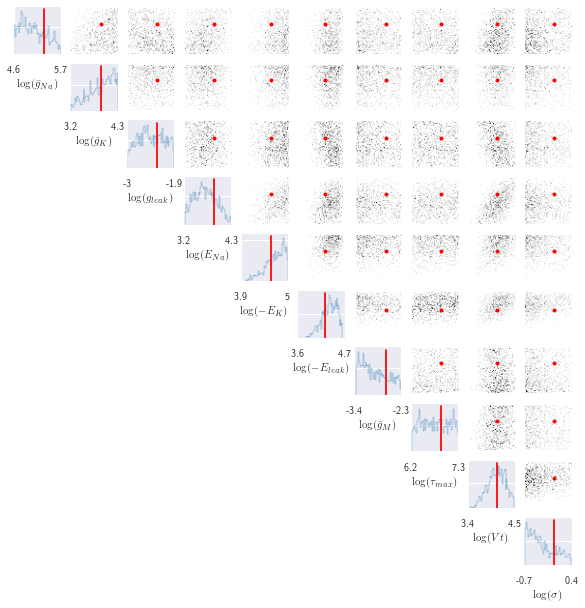

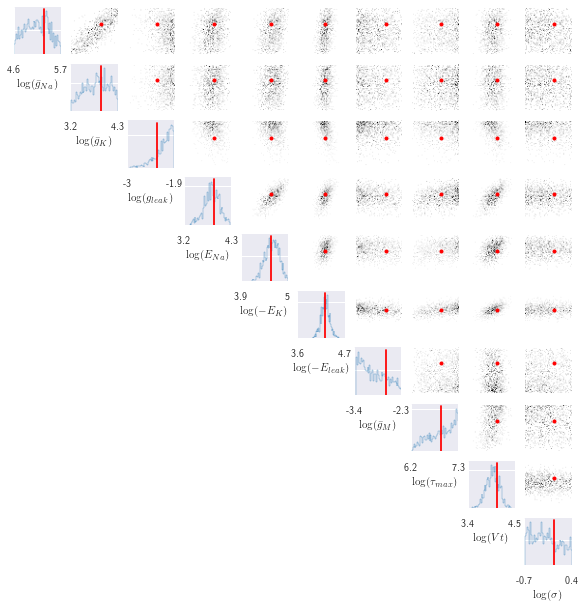

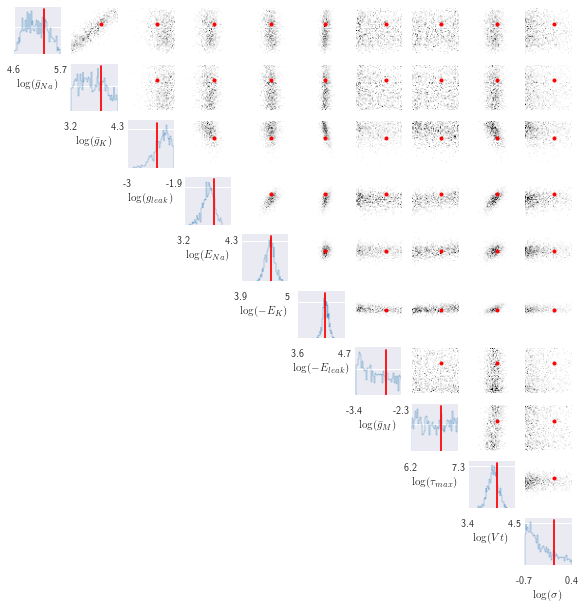

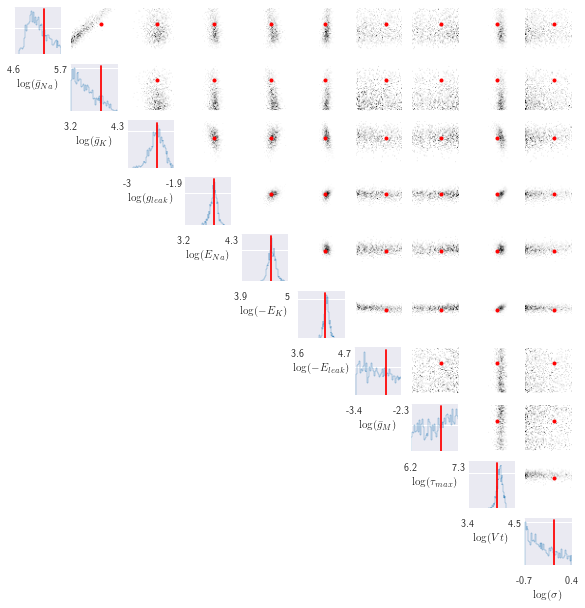

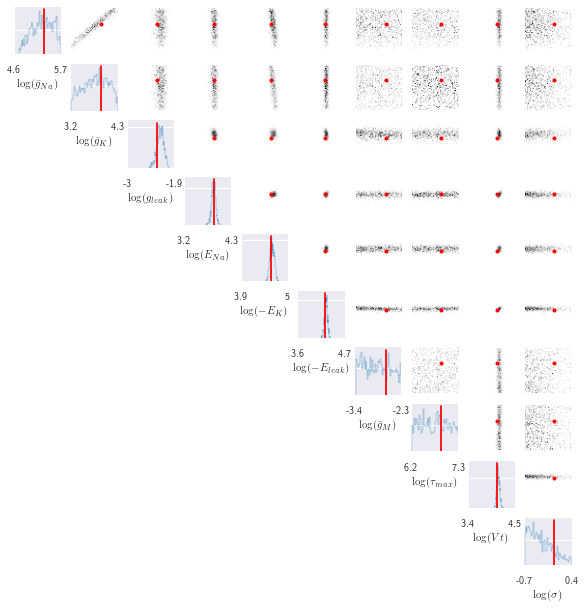

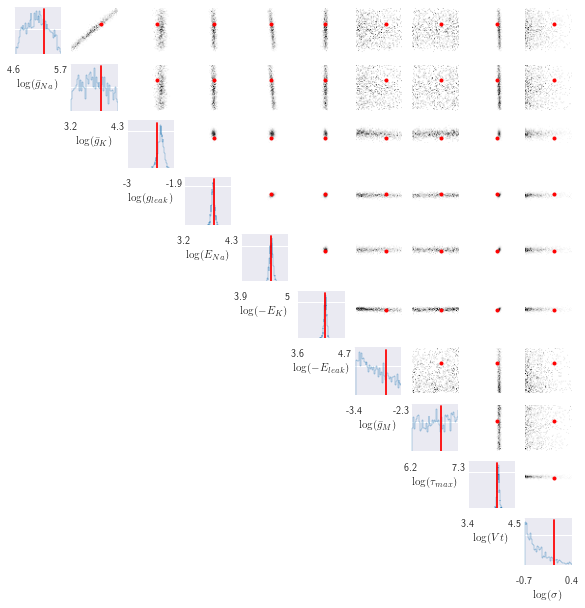

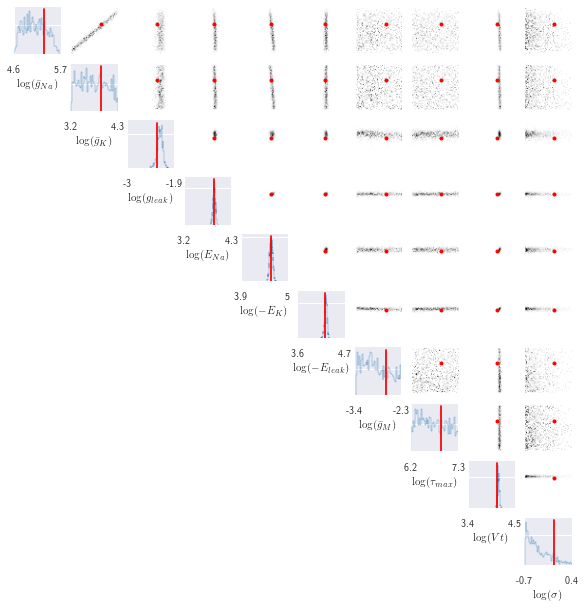

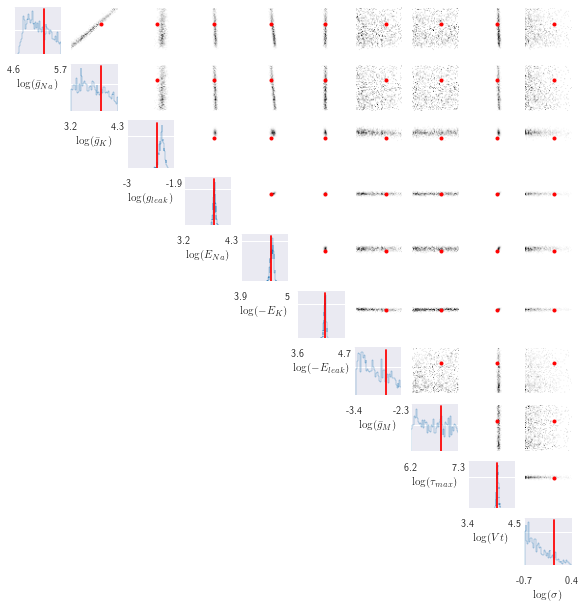

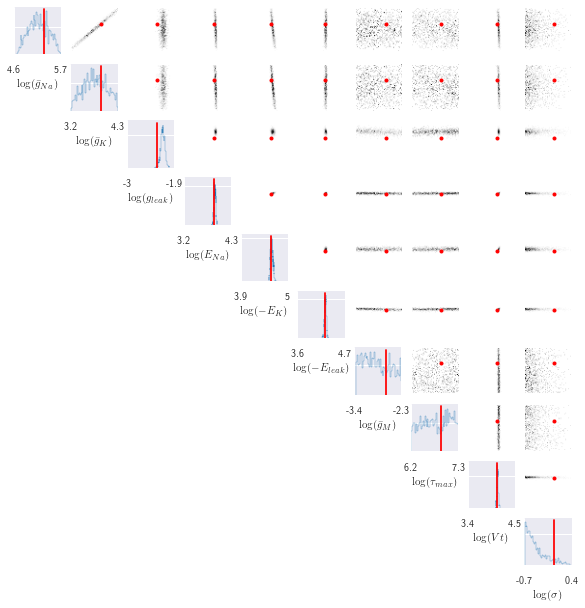

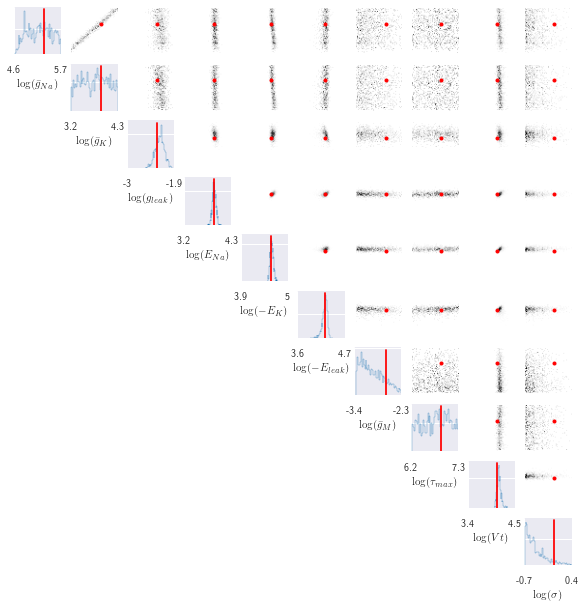

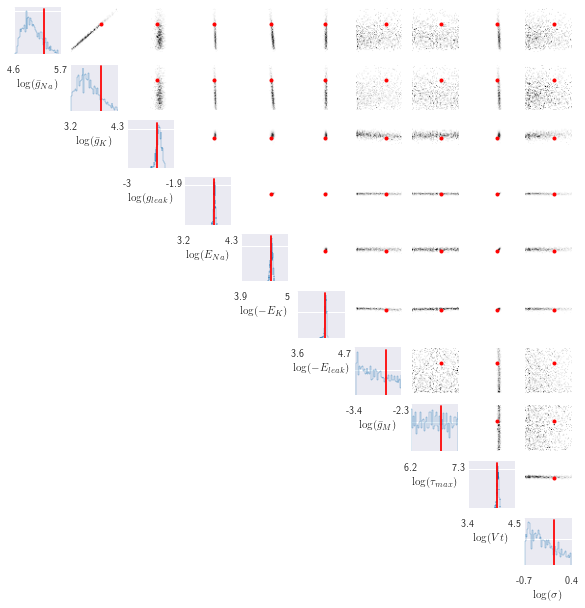

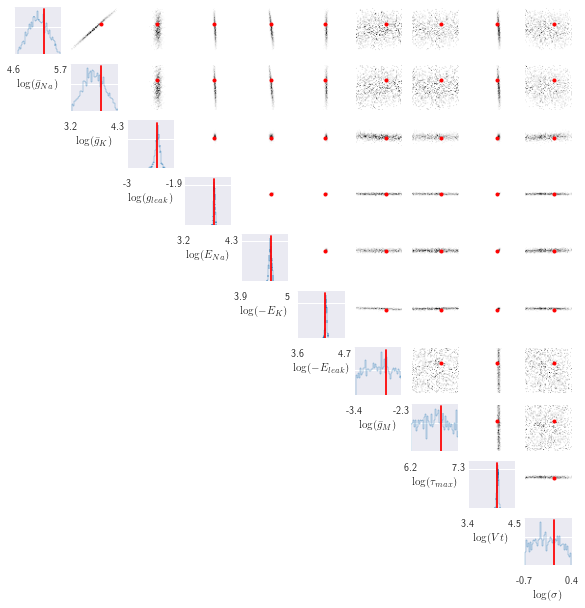

In [32]:
for i in range(nbr_rounds):
    fig, axes = utils.pairplot(snpla_post[i][0],
                           points=torch.as_tensor(model.log_theta_true),
                           points_offdiag={'markersize': 6},
                           points_colors='r',
                           limits=prior_limits,
                           ticks=prior_limits,
                           labels = labels)

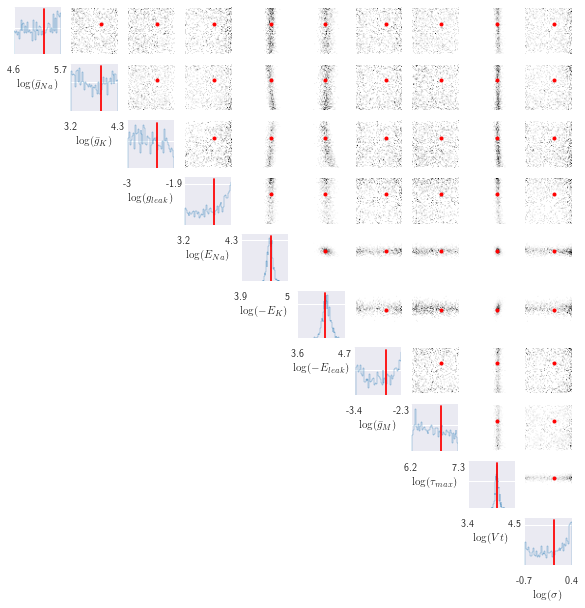

In [205]:
fig, axes = utils.pairplot(smcabc_post[0][0],
                           points=torch.as_tensor(model.log_theta_true),
                           points_offdiag={'markersize': 6},
                           points_colors='r',
                           limits=prior_limits,
                           ticks=prior_limits,
                           labels = labels)
plt.savefig("./fig/post_samples_smcabc.pdf", bbox_inches='tight')

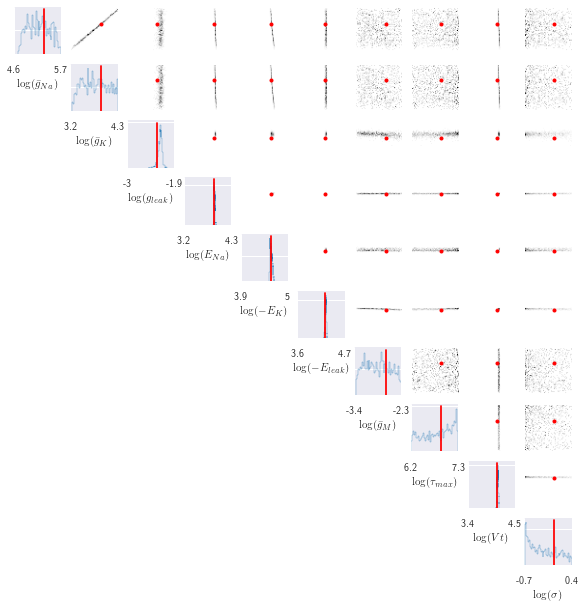

In [206]:
fig, axes = utils.pairplot(snpe_c_post[-1][0],
                           points=torch.as_tensor(model.log_theta_true),
                           points_offdiag={'markersize': 6},
                           points_colors='r',
                           limits=prior_limits,
                           ticks=prior_limits,
                           labels = labels)
plt.savefig("./fig/post_samples_snpe_c.pdf", bbox_inches='tight')

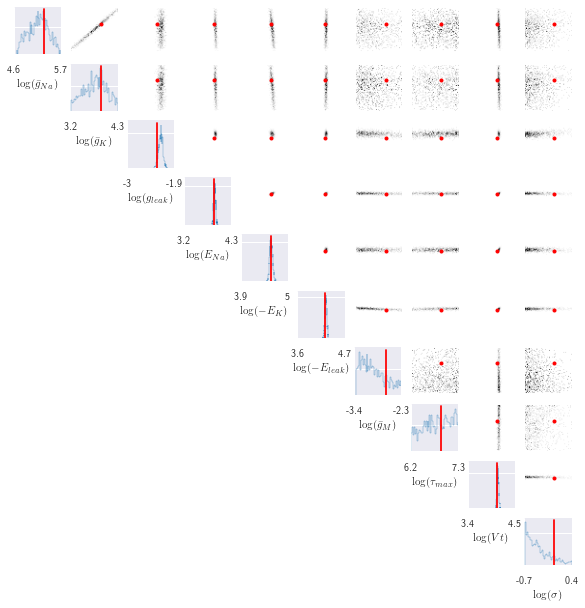

In [207]:
fig, axes = utils.pairplot(snl_post[-1][0],
                           points=torch.as_tensor(model.log_theta_true),
                           points_offdiag={'markersize': 6},
                           points_colors='r',
                           limits=prior_limits,
                           ticks=prior_limits,
                           labels = labels)
plt.savefig("./fig/post_samples_snl.pdf", bbox_inches='tight')


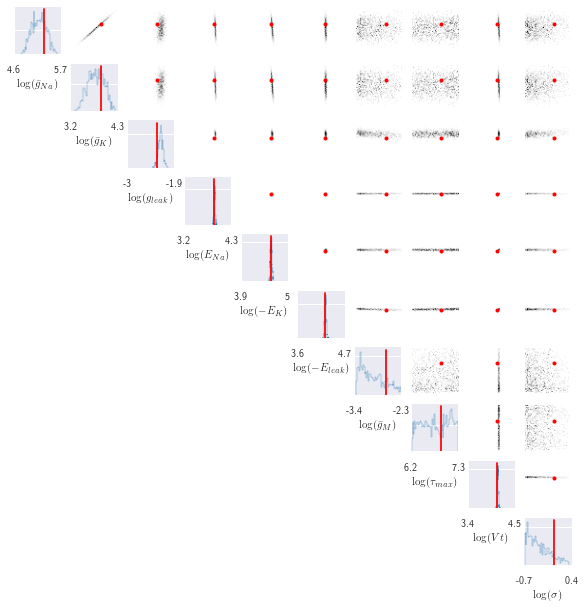

In [208]:
fig, axes = utils.pairplot(snpla_post[-1][0],
                           points=torch.as_tensor(model.log_theta_true),
                           points_offdiag={'markersize': 6},
                           points_colors='r',
                           limits=prior_limits,
                           ticks=prior_limits,
                          labels = labels)
plt.savefig("./fig/post_samples_snpla.pdf", bbox_inches='tight')


### Posterior pred sampels 

In [209]:
post_idx = random.sample(range(1, 100), 10)

v_path_snpe_c = []
v_path_snl = []
v_path_snpla = []

for idx in post_idx:
    v_path_snpe_c.append(model.simulator(snpe_c_post[-1][0][idx,:], seed_data))
    v_path_snl.append(model.simulator(snl_post[-1][0][idx,:], seed_data))
    v_path_snpla.append(model.simulator(snpla_post[-1][0][idx,:], seed_data))


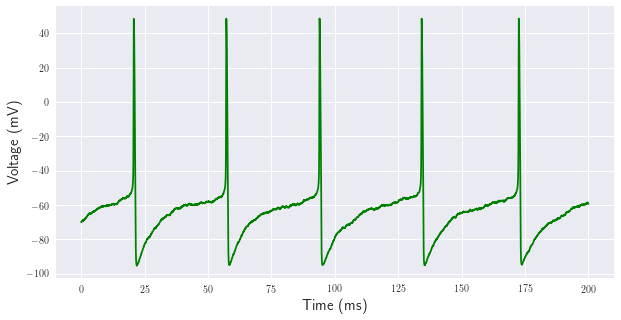

In [210]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_vec, v_true, color = "g")
ax.set_xlabel("Time (ms)", fontsize=15)
ax.set_ylabel("Voltage (mV)", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.savefig("./fig/simulated_data_set.pdf")

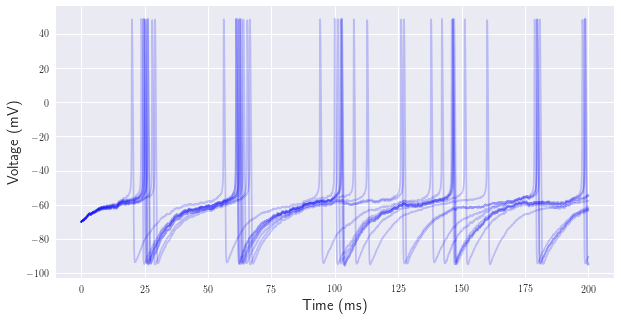

In [211]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1, 1, 1)
for p in v_path_snpe_c: 
    ax.plot(t_vec, p, color = "b", alpha=0.2)
ax.set_xlabel("Time (ms)", fontsize=15)
ax.set_ylabel("Voltage (mV)", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.savefig("./fig/posterior_pred_paths_snpe_c.pdf")

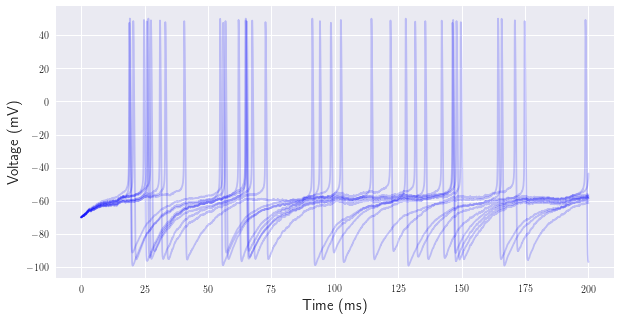

In [212]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1, 1, 1)
for p in v_path_snl: 
    ax.plot(t_vec, p, color = "b", alpha=0.2)
ax.set_xlabel("Time (ms)", fontsize=15)
ax.set_ylabel("Voltage (mV)", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.savefig("./fig/posterior_pred_paths_snl.pdf")

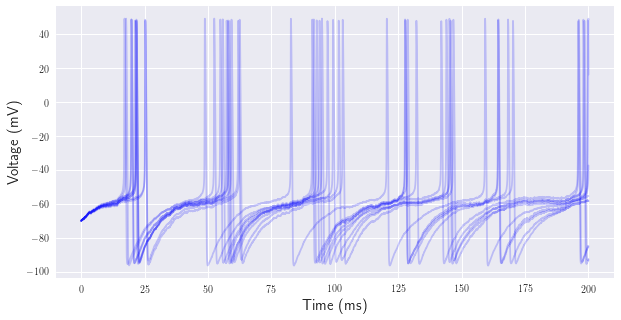

In [213]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1, 1, 1)
for p in v_path_snpla: 
    ax.plot(t_vec, p, color = "b", alpha=0.2)
ax.set_xlabel("Time (ms)", fontsize=15)
ax.set_ylabel("Voltage (mV)", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.savefig("./fig/posterior_pred_paths_snpla.pdf")

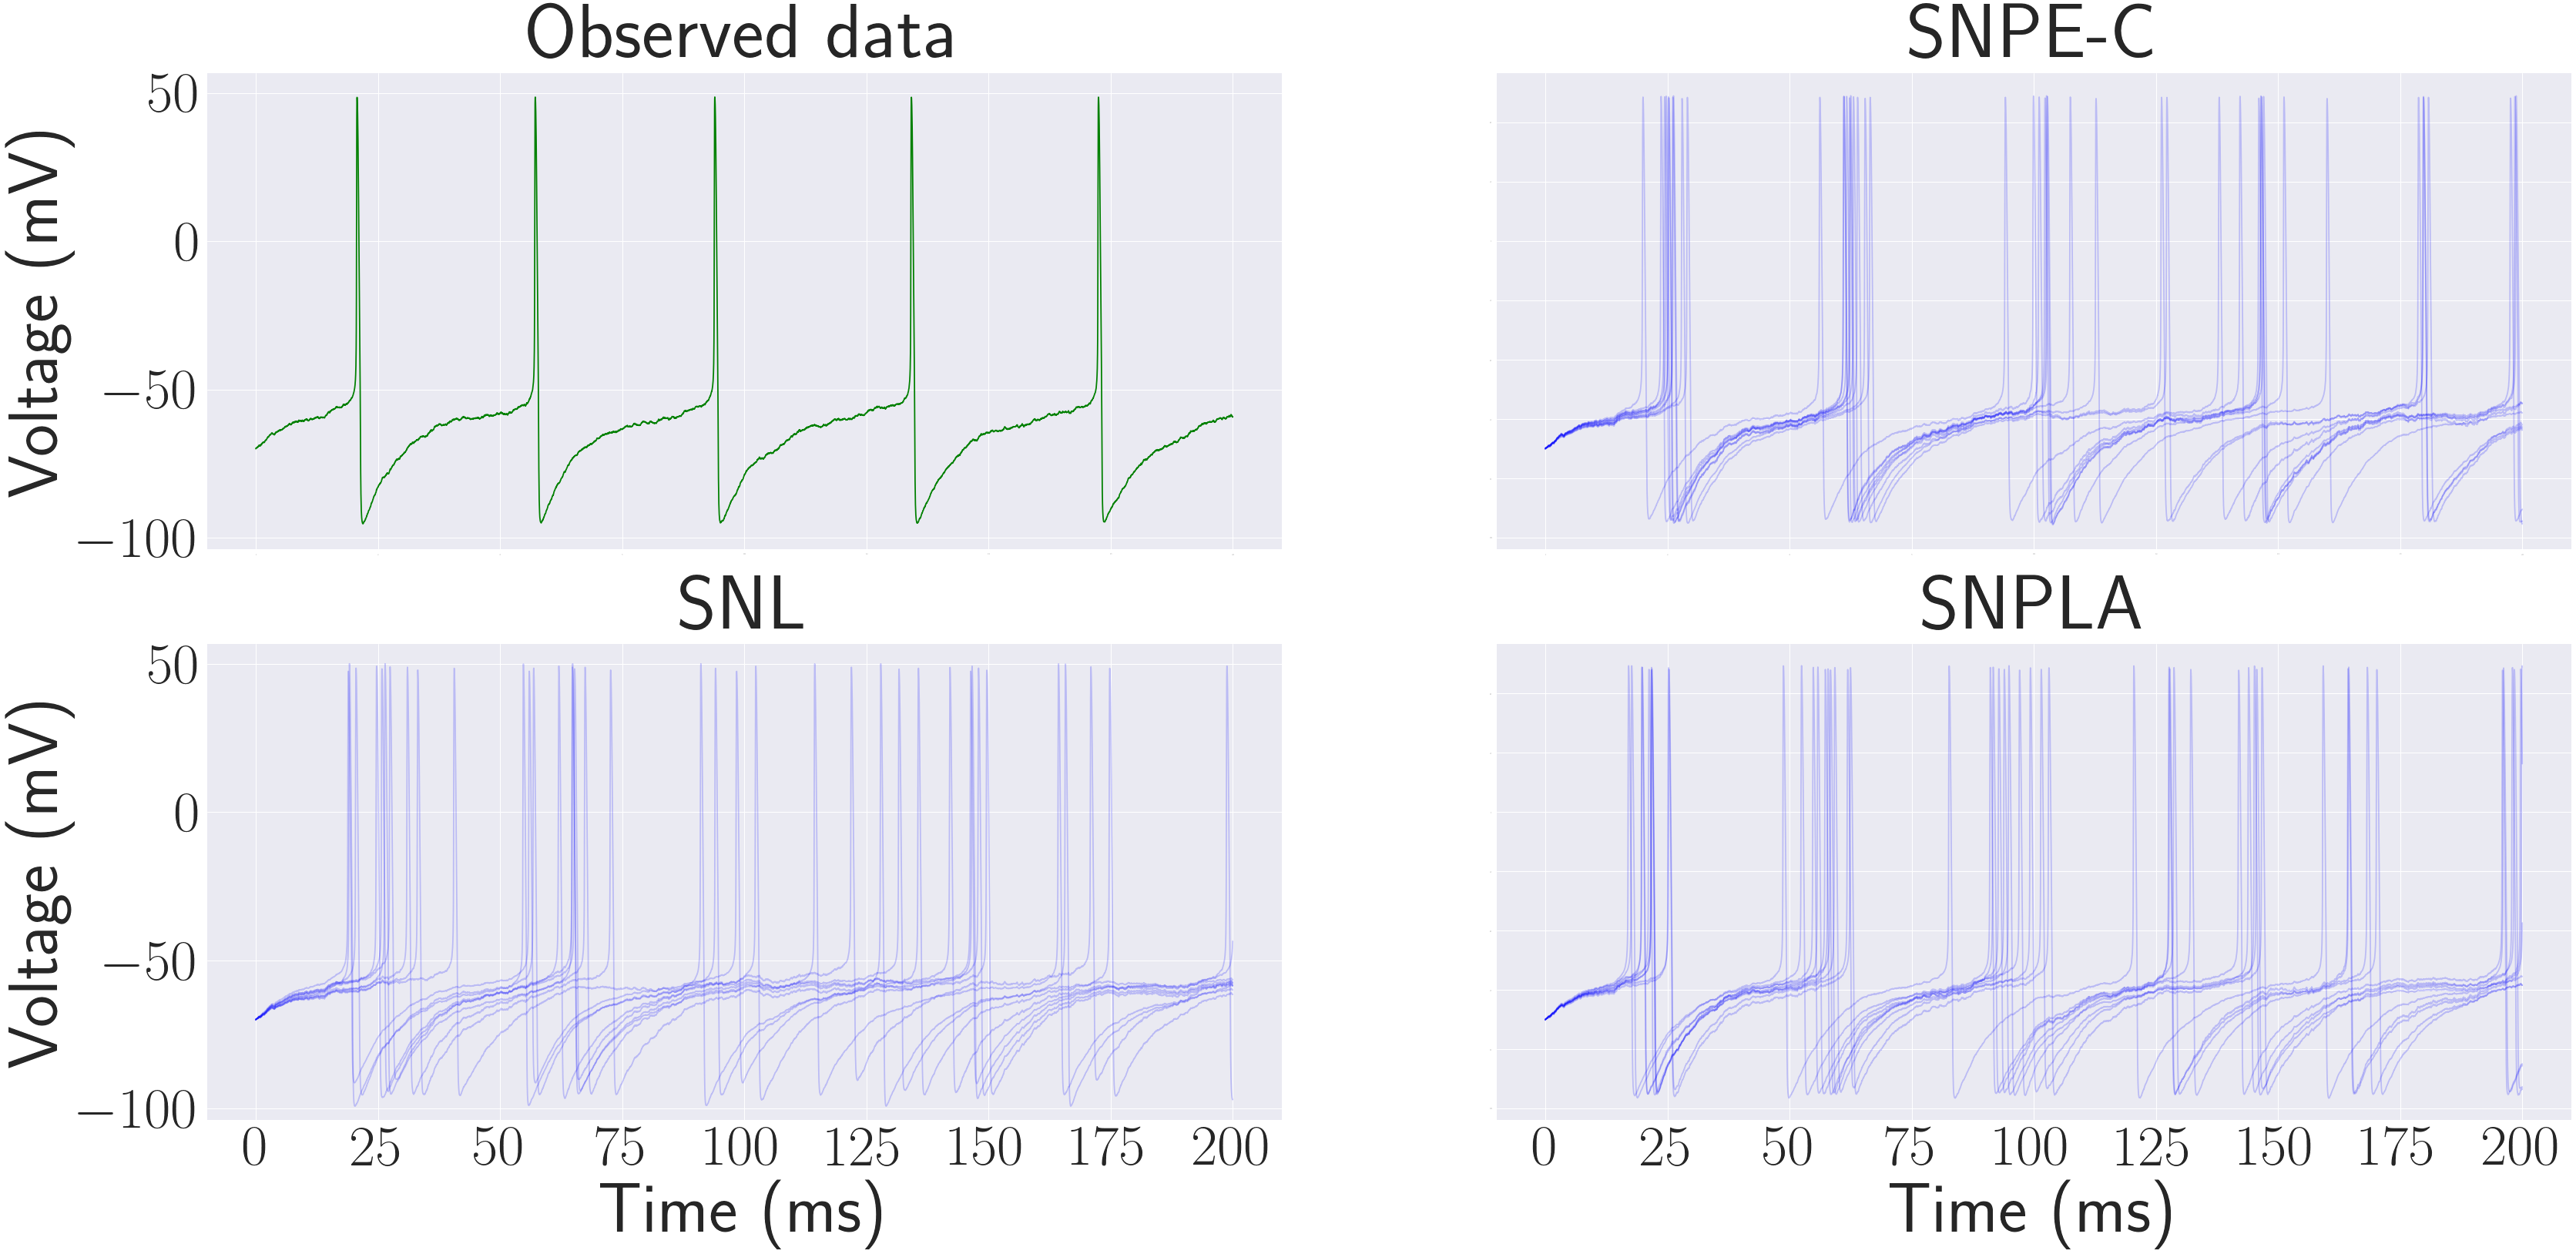

In [214]:
fig = plt.figure(figsize = (55,25))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharex=ax1) # why arent the axis fixed
ax3 = fig.add_subplot(2, 2, 3, sharex=ax1)
ax4 = fig.add_subplot(2, 2, 4, sharex=ax1)

ax1.plot(t_vec, v_true, color = "g")

for p in v_path_snpe_c: 
    ax2.plot(t_vec, p, color = "b", alpha=0.2)

for p in v_path_snl: 
    ax3.plot(t_vec, p, color = "b", alpha=0.2)

for p in v_path_snpla: 
    ax4.plot(t_vec, p, color = "b", alpha=0.2)

ax3.set_xlabel("Time (ms)", fontsize=90)
ax1.set_ylabel("Voltage (mV)", fontsize=90)
80
ax4.set_xlabel("Time (ms)", fontsize=90)
ax3.set_ylabel("Voltage (mV)", fontsize=90)

    
ax1.set_title("Observed data",fontsize=100)
ax2.set_title("SNPE-C",fontsize=100)
ax3.set_title("SNL",fontsize=100)
ax4.set_title("SNPLA",fontsize=100)

for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='major', labelsize=75)
    ax.tick_params(axis='both', which='minor', labelsize=70)
    ax.set_xlim(ax1.get_xlim())
    ax.set_ylim(ax4.get_ylim())
    
for ax in [ax1, ax2]: 

    
    #ax.tick_params(axis='y', which='major', labelsize=0)
    #ax.tick_params(axis='y', which='minor', labelsize=0)

    ax.tick_params(axis='x', which='major', labelsize=0)
    ax.tick_params(axis='x', which='minor', labelsize=0)

for ax in [ax2, ax4]: 

    
    ax.tick_params(axis='y', which='major', labelsize=0)
    ax.tick_params(axis='y', which='minor', labelsize=0)

    #ax.tick_params(axis='x', which='major', labelsize=0)
    #ax.tick_params(axis='x', which='minor', labelsize=0)

    
    
plt.savefig("./fig/posterior_pred_paths.pdf", bbox_inches='tight')

### Predictions of nbr peaks

In [53]:
job

'snl_10_200'

In [195]:
run = 1

In [196]:
p = "data/" + "ture_summary_stats_post_samples_snpla_"  + job + '_' + str(run) + '.csv'
ture_summary_stats_post_samples = np.loadtxt(p, delimiter=",")

p = "data/" + "pred_summary_stas_post_samples_snpla_"  + job + '_' + str(run) + '.csv'
pred_summary_stas_post_samples = np.loadtxt(p, delimiter=",")

In [197]:
ture_summary_stats_post_samples_nbr_peaks = ture_summary_stats_post_samples[:,0]#.round()
pred_summary_stas_post_samples = pred_summary_stas_post_samples[:,0]#.round()



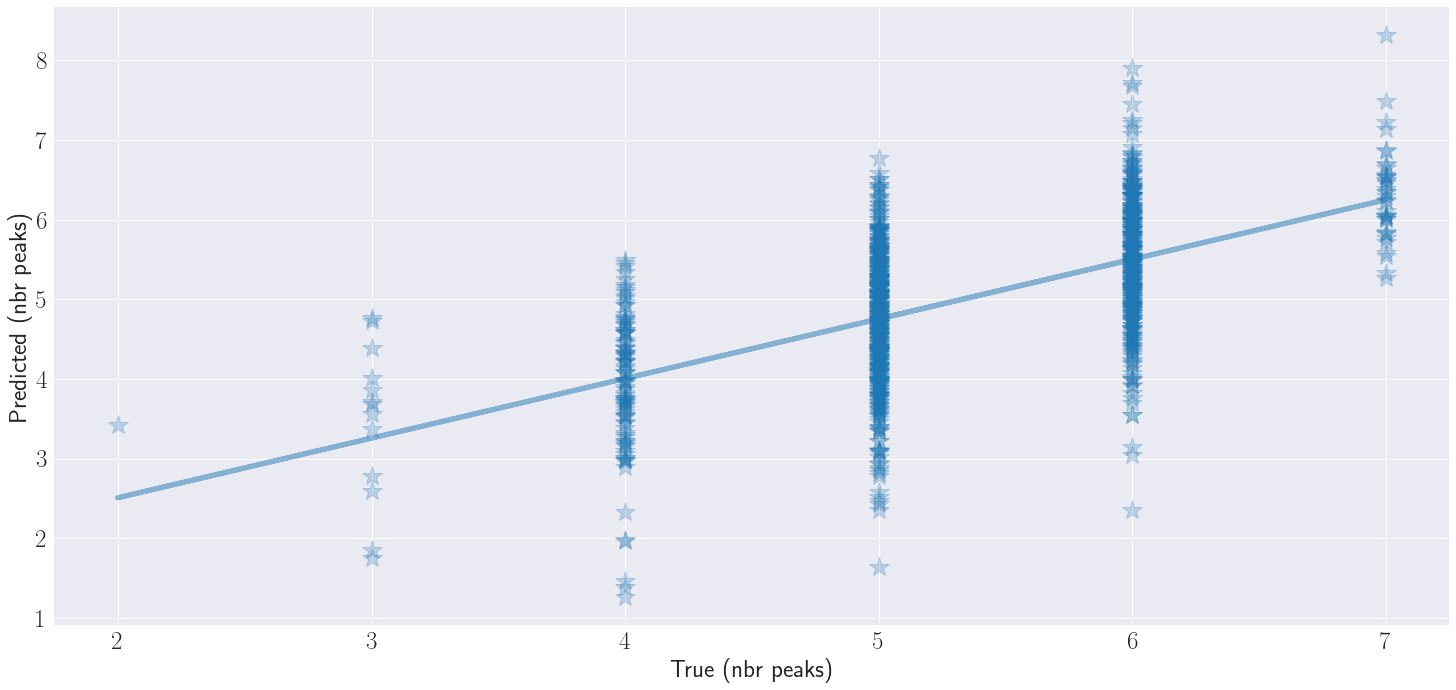

In [198]:
fig = plt.figure(figsize = (55,25))
ax = fig.add_subplot(2, 2, 1)

ax.plot(ture_summary_stats_post_samples_nbr_peaks, pred_summary_stas_post_samples, 
         "*", markersize=20, linewidth=6, alpha = 0.25, color = "tab:blue")


x = ture_summary_stats_post_samples_nbr_peaks
y = pred_summary_stas_post_samples

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x), linewidth=5, alpha = 0.5, color = "tab:blue")


ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)

ax.set_ylabel("Predicted (nbr peaks)", fontsize=25)
ax.set_xlabel("True (nbr peaks)", fontsize=25)

plt.savefig("./fig/pred_nbr_peaks.pdf", bbox_inches='tight')


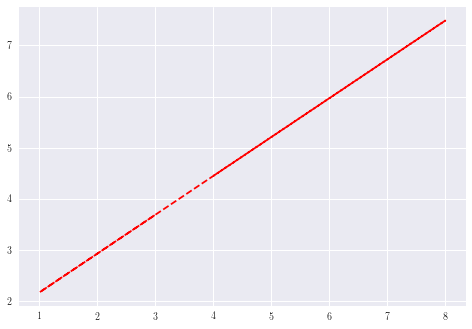

In [149]:
x = ture_summary_stats_post_samples_nbr_peaks
y = pred_summary_stas_post_samples

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")


In [187]:
p = "data/" + "ture_summary_stats_prio_samples_snpla_" + job + '_' + str(run) + '.csv'
ture_summary_stats_prior_samples = np.loadtxt(p, delimiter=",")

p = "data/" + "pred_summary_stas_prior_samples_snpla_" + job + '_' + str(run) + '.csv'
pred_summary_stas_prior_samples = np.loadtxt(p, delimiter=",")

In [188]:
ture_summary_stats_prior_nbr_peaks = ture_summary_stats_prior_samples[:,0]#.round()
pred_summary_stas_prior_nbr_peaks = pred_summary_stas_prior_samples[:,0]#.round()


In [189]:
def find_idex_within_range(vec, lower, upper):
    return [i for i in range(len(vec)) if vec[i] <= upper and vec[i] >= lower]
    
    
def common_elements(vec1, vec2):
    result = []
    for element in vec1:
        if element in vec2:
            result.append(element)
    return result

In [190]:
upper_lim = 8 # 7, 8
lower_lim = 4 # 2, 4


In [191]:
idx_true_approx_obs_data = find_idex_within_range(ture_summary_stats_prior_nbr_peaks, lower_lim, upper_lim)
idx_pred_approx_obs_data = find_idex_within_range(pred_summary_stas_prior_nbr_peaks, lower_lim, upper_lim)


In [192]:
idx_same_approx_obs_data = set(idx_true_approx_obs_data) - (set(idx_true_approx_obs_data) - set(idx_pred_approx_obs_data))

In [193]:
ratio_same = len(idx_same_approx_obs_data)/len(idx_true_approx_obs_data)

In [194]:
print("Same idex in true and pred: " + str(round(ratio_same*100,2)) + " %")

Same idex in true and pred: 75.0 %


In [228]:
print("Same idex in true and pred: " + str(round(ratio_same*100,2)) + " %")

Same idex in true and pred: 46.74 %


Text(0.5, 0, 'True')

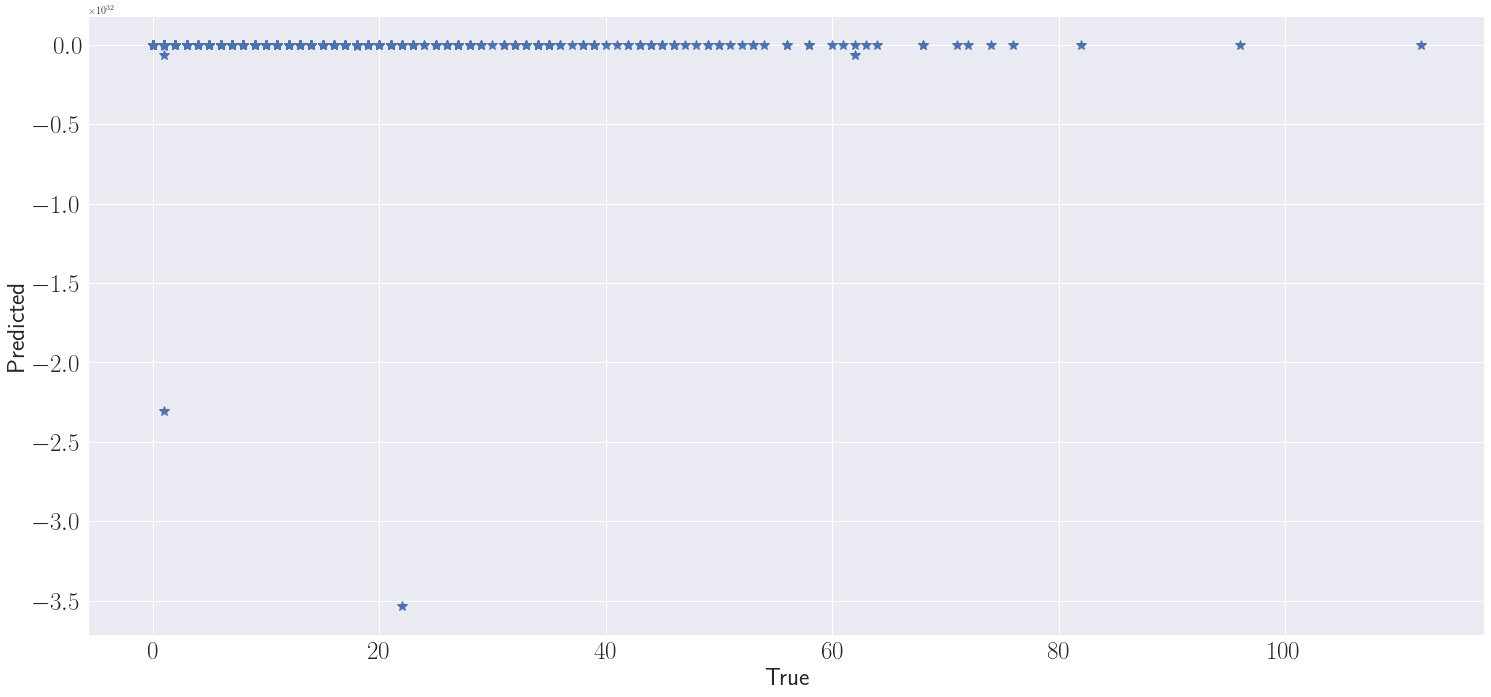

In [175]:
fig = plt.figure(figsize = (55,25))
ax = fig.add_subplot(2, 2, 1)

ax.plot(ture_summary_stats_prior_nbr_peaks, pred_summary_stas_prior_nbr_peaks, 
         "*", markersize=10, linewidth=6)

ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)

ax.set_ylabel("Predicted", fontsize=25)
ax.set_xlabel("True", fontsize=25)


In [91]:
pred_summary_stas_prior_samples[:,0]

array([ 4.91389190e+00, -1.08354574e-01,  1.94470401e+01,  6.47326199e-01,
        4.69431608e+00,  1.15708843e+00, -2.17121164e-02,  5.93635712e+00,
        9.04561421e+00,  2.62997912e+01,  1.16349233e+01,  2.59344879e+00,
        3.81636451e-01,  5.73639969e+00,  1.51931351e+01,  8.60448860e+00,
        8.72962703e-02, -9.46319796e+28,  2.78680343e+00,  1.30954192e-02,
        4.73357399e+00,             nan, -2.67445814e-02,  9.98130450e-03,
        4.92246464e+01,  7.80925852e+00,  2.52634891e+00,  2.88163759e-01,
        6.84660408e+00, -5.68178567e-02,  8.50720056e+00, -4.95266558e-02,
        1.57291880e-01,  1.01908269e+00,  6.83967975e+00,  2.60531748e+00,
       -5.69989086e-02,  3.69866424e-02,  1.53950034e-01,  5.70912252e+00,
        4.43102101e+00,  3.19747715e+00,  1.38868121e+01,  1.05059442e+00,
        1.04725096e+01,  1.27170868e+01, -3.45382034e-02,  1.37271561e+01,
        2.32707456e+00,  4.29539487e+00,  1.81387603e+01,             nan,
        1.18058925e+01,  

In [92]:
ture_summary_stats_prior_samples[:,0]

array([ 5.99999997e+00, -5.54826922e-07,  1.70000001e+01, -4.81181488e-07,
        1.20000001e+01,  6.59366695e-08, -2.46322131e-07,  5.99999965e+00,
        8.00000007e+00,  3.89999988e+01,  8.00000001e+00,  2.00000036e+00,
       -2.46314347e-08,  6.80000019e+01,  1.79999996e+01,  6.99999966e+00,
       -9.85017543e-08,  9.99999928e-01,  9.99999814e-01,  3.58543563e-07,
        1.00000000e+01,  9.99999448e-01, -1.75987299e-07, -6.38544018e-07,
        4.49999999e+01,  8.00000004e+00,  9.99999491e-01, -7.18300441e-08,
        6.00000040e+00,  2.00501489e-07,  3.90000005e+01,  2.96388745e-07,
       -1.40133999e-07, -5.11384357e-08,  1.00000027e+00,  9.99999860e-01,
       -4.66670150e-07,  8.13332015e-07, -1.80342134e-07,  6.10000020e+01,
        5.00000034e+00,  6.99999948e+00,  1.39999993e+01,  2.21772066e-07,
        1.19999996e+01,  1.10000000e+01,  1.12118007e-07,  9.59999985e+01,
        9.99999639e-01,  7.99999984e+00,  1.30000000e+01,  1.00000014e+00,
        1.09999999e+01,  

# Quantile intervals for res inference 

In [35]:
print(np.round(model.log_theta_true,3))

[ 5.298  3.912 -2.303  3.912  4.605  4.248 -2.659  6.908  4.094  0.   ]


In [36]:
print(np.round(np.quantile(snpe_c_post[-1][0], 0.25, axis = 0),3))
print(np.round(np.median(snpe_c_post[-1][0],axis = 0),3))
print(np.round(np.quantile(snpe_c_post[-1][0], 0.75, axis = 0),3))


[ 4.863  3.454 -2.346  3.895  4.599  4.242 -2.946  6.506  4.095 -0.516]
[ 5.11   3.698 -2.302  3.913  4.62   4.25  -2.685  6.814  4.104 -0.257]
[ 5.361  4.019 -2.261  3.929  4.644  4.257 -2.478  7.107  4.112  0.118]


In [37]:
for i in range(nbr_params):
    
    s_temp_1 = str(np.round(np.median(snpe_c_post[-1][0],axis = 0),3)[i]) 
    s_temp_2 = ", ("
    s_temp_3 = str(np.round(np.quantile(snpe_c_post[-1][0], 0.25, axis = 0),3)[i])
    s_temp_4 = ", "
    s_temp_5 = str(np.round(np.quantile(snpe_c_post[-1][0], 0.75, axis = 0),3)[i])
    s_temp_6 = ")"
    
    s_temp = s_temp_1 + s_temp_2 + s_temp_3 + s_temp_4 + s_temp_5 + s_temp_6
    print(s_temp)


5.11, (4.863, 5.361)
3.698, (3.454, 4.019)
-2.302, (-2.346, -2.261)
3.913, (3.895, 3.929)
4.62, (4.599, 4.644)
4.25, (4.242, 4.257)
-2.685, (-2.946, -2.478)
6.814, (6.506, 7.107)
4.104, (4.095, 4.112)
-0.257, (-0.516, 0.118)


In [38]:
print(np.round(np.quantile(snl_post[-1][0], 0.25, axis = 0),3))
print(np.round(np.median(snl_post[-1][0],axis = 0),3))
print(np.round(np.quantile(snl_post[-1][0], 0.75, axis = 0),3))


[ 4.982  3.54  -2.363  3.875  4.575  4.243 -3.098  6.539  4.085 -0.54 ]
[ 5.212  3.81  -2.3    3.912  4.62   4.271 -2.876  6.839  4.109 -0.344]
[ 5.429  4.055 -2.231  3.954  4.662  4.298 -2.637  7.091  4.135 -0.108]


In [39]:
for i in range(nbr_params):
    
    s_temp_1 = str(np.round(np.median(snl_post[-1][0],axis = 0),3)[i]) 
    s_temp_2 = ", ("
    s_temp_3 = str(np.round(np.quantile(snl_post[-1][0], 0.25, axis = 0),3)[i])
    s_temp_4 = ", "
    s_temp_5 = str(np.round(np.quantile(snl_post[-1][0], 0.75, axis = 0),3)[i])
    s_temp_6 = ")"
    
    s_temp = s_temp_1 + s_temp_2 + s_temp_3 + s_temp_4 + s_temp_5 + s_temp_6
    print(s_temp)

5.212, (4.982, 5.429)
3.81, (3.54, 4.055)
-2.3, (-2.363, -2.231)
3.912, (3.875, 3.954)
4.62, (4.575, 4.662)
4.271, (4.243, 4.298)
-2.876, (-3.098, -2.637)
6.839, (6.539, 7.091)
4.109, (4.085, 4.135)
-0.344, (-0.54, -0.108)


In [40]:
print(np.round(np.quantile(snpla_post[-1][0], 0.25, axis = 0),3))
print(np.round(np.median(snpla_post[-1][0],axis = 0),3))
print(np.round(np.quantile(snpla_post[-1][0], 0.75, axis = 0),3))


[ 5.098  3.666 -2.518  4.016  4.756  4.325 -3.161  6.71   4.186 -0.501]
[ 5.29   3.89  -2.439  4.098  4.848  4.38  -2.933  6.969  4.233 -0.296]
[ 5.47   4.098 -2.349  4.172  4.92   4.426 -2.645  7.154  4.28  -0.02 ]


In [41]:
for i in range(nbr_params):
    
    s_temp_1 = str(np.round(np.median(snpla_post[-1][0],axis = 0),3)[i]) 
    s_temp_2 = ", ("
    s_temp_3 = str(np.round(np.quantile(snpla_post[-1][0], 0.25, axis = 0),3)[i])
    s_temp_4 = ", "
    s_temp_5 = str(np.round(np.quantile(snpla_post[-1][0], 0.75, axis = 0),3)[i])
    s_temp_6 = ")"
    
    s_temp = s_temp_1 + s_temp_2 + s_temp_3 + s_temp_4 + s_temp_5 + s_temp_6
    print(s_temp)

5.29, (5.098, 5.47)
3.89, (3.666, 4.098)
-2.439, (-2.518, -2.349)
4.098, (4.016, 4.172)
4.848, (4.756, 4.92)
4.38, (4.325, 4.426)
-2.933, (-3.161, -2.645)
6.969, (6.71, 7.154)
4.233, (4.186, 4.28)
-0.296, (-0.501, -0.02)


In [42]:
np.round(model.log_theta_true,3)


array([ 5.298,  3.912, -2.303,  3.912,  4.605,  4.248, -2.659,  6.908,
        4.094,  0.   ])